In [1]:
from pathlib import Path
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

if torch.backends.mps.is_available():
    device = torch.device('mps')
elif torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(f"Using device: {device}")

# 创建模型和结果保存目录
Path("../model").mkdir(parents=True, exist_ok=True)
Path("../result").mkdir(parents=True, exist_ok=True)

Using device: mps


# Hyperparameters

In [2]:
batch_size = 256
num_epochs = 50
hidden_sizes = [1024, 512, 256, 128]

In [3]:
# CIFAR-10 images are 32x32 with 3 color channels
input_size = 32 * 32 * 3
num_classes = 10

In [4]:
# Data transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='../data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='../data', train=False, download=True, transform=transform)

# Split training data into training and validation sets (80% train, 20% validation)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Random samples from training dataset:


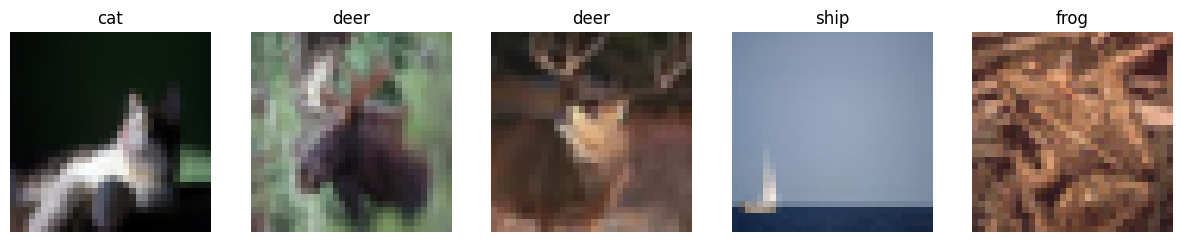

Class distribution in training dataset:


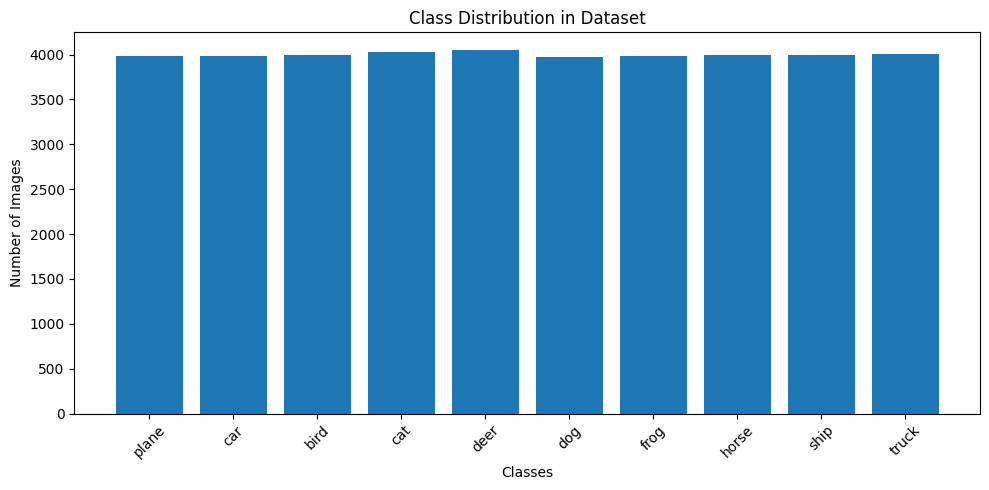

In [5]:
from utils import show_random_images, plot_class_distribution

# 显示一些随机样本
print("Random samples from training dataset:")
show_random_images(train_dataset, classes)

# 显示训练集的类别分布
print("Class distribution in training dataset:")
plot_class_distribution(train_dataset, classes)

In [6]:
class FullyConnectedNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(FullyConnectedNN, self).__init__()
        
        self.flatten = nn.Flatten()
        
        layers = []
        
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.ReLU())
        
        for i in range(len(hidden_sizes) - 1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
            layers.append(nn.ReLU())
        
        layers.append(nn.Linear(hidden_sizes[-1], num_classes))
        
        self.linear_layers = nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.flatten(x)
        out = self.linear_layers(x)
        return out

In [7]:
from utils import train_model, test_model, plot_learning_curves


def experiment(
    model,
    train_loader,
    val_loader,
    test_loader,
    criterion,
    optimizer,
    num_epochs,
    device,
):
    """
    使用不同的损失函数、优化器和正则化方法对模型进行训练和测试。
    """
    # 生成唯一的模型名称
    model_name = f"cifar10_fcnn_{criterion.__class__.__name__}_{optimizer.__class__.__name__}"
    print(f"Running experiment with {criterion.__class__.__name__}, {optimizer.__class__.__name__}")

    # 训练模型并获取历史记录
    history = train_model(
        model,
        train_loader,
        val_loader,
        test_loader,
        criterion,
        optimizer,
        num_epochs,
        device,
        model_name
    )

    # 返回训练历史和最佳模型信息
    return history

In [ ]:
# 保存所有实验结果的字典
experiments_results = {}

**以下是几种损失函数和优化器组合进行训练并得到结果的过程，组合有：**

- **CrossEntropy Loss + SGD**
- **CrossEntropy Loss + Momentum**
- **CrossEntropy Loss + Adagrad**
- **CrossEntropy Loss + Adam**
- **CrossEntropy Loss + Adamax**
- **Label Smoothing Loss + SGD**
- **Label Smoothing Loss + Momentum**
- **Label Smoothing Loss + Adagrad**
- **Label Smoothing Loss + Adam**
- **Label Smoothing Loss + Adamax**

### CrossEntropy Loss + SGD

In [9]:
# 实验1: CrossEntropyLoss + SGD
model = FullyConnectedNN(input_size, hidden_sizes, num_classes).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

history_ce_sgd = experiment(
    model,
    train_loader,
    val_loader,
    test_loader,
    criterion=loss_fn,
    optimizer=optimizer,
    num_epochs=num_epochs,
    device=device,
)
experiments_results['CrossEntropyLoss_SGD'] = history_ce_sgd

Running experiment with CrossEntropyLoss, SGD


Epoch 1/50: 100%|██████████| 157/157 [00:03<00:00, 40.16it/s, loss: 2.3020 - acc: 9.99%]


Epoch 1/50 - loss: 2.3020 - acc: 9.99% - val_loss: 2.3001 - val_acc: 10.30% - test_acc: 10.25%


Epoch 2/50: 100%|██████████| 157/157 [00:03<00:00, 47.10it/s, loss: 2.2985 - acc: 11.22%]


Epoch 2/50 - loss: 2.2985 - acc: 11.22% - val_loss: 2.2966 - val_acc: 13.28% - test_acc: 13.60%


Epoch 3/50: 100%|██████████| 157/157 [00:03<00:00, 47.37it/s, loss: 2.2944 - acc: 14.99%]


Epoch 3/50 - loss: 2.2944 - acc: 14.99% - val_loss: 2.2920 - val_acc: 17.24% - test_acc: 17.15%


Epoch 4/50: 100%|██████████| 157/157 [00:03<00:00, 44.98it/s, loss: 2.2882 - acc: 18.80%]


Epoch 4/50 - loss: 2.2882 - acc: 18.80% - val_loss: 2.2847 - val_acc: 19.87% - test_acc: 20.07%


Epoch 5/50: 100%|██████████| 157/157 [00:03<00:00, 46.54it/s, loss: 2.2782 - acc: 20.68%]


Epoch 5/50 - loss: 2.2782 - acc: 20.68% - val_loss: 2.2719 - val_acc: 21.88% - test_acc: 22.03%


Epoch 6/50: 100%|██████████| 157/157 [00:03<00:00, 48.19it/s, loss: 2.2595 - acc: 22.68%]


Epoch 6/50 - loss: 2.2595 - acc: 22.68% - val_loss: 2.2467 - val_acc: 24.03% - test_acc: 24.41%


Epoch 7/50: 100%|██████████| 157/157 [00:03<00:00, 47.27it/s, loss: 2.2217 - acc: 23.85%]


Epoch 7/50 - loss: 2.2217 - acc: 23.85% - val_loss: 2.1954 - val_acc: 24.57% - test_acc: 24.81%


Epoch 8/50: 100%|██████████| 157/157 [00:03<00:00, 47.50it/s, loss: 2.1570 - acc: 24.00%]


Epoch 8/50 - loss: 2.1570 - acc: 24.00% - val_loss: 2.1232 - val_acc: 24.39% - test_acc: 24.36%


Epoch 9/50: 100%|██████████| 157/157 [00:03<00:00, 48.32it/s, loss: 2.0913 - acc: 24.67%]


Epoch 9/50 - loss: 2.0913 - acc: 24.67% - val_loss: 2.0605 - val_acc: 25.15% - test_acc: 25.21%


Epoch 10/50: 100%|██████████| 157/157 [00:03<00:00, 50.03it/s, loss: 2.0378 - acc: 25.74%]


Epoch 10/50 - loss: 2.0378 - acc: 25.74% - val_loss: 2.0087 - val_acc: 26.75% - test_acc: 26.87%


Epoch 11/50: 100%|██████████| 157/157 [00:03<00:00, 50.08it/s, loss: 1.9934 - acc: 27.38%]


Epoch 11/50 - loss: 1.9934 - acc: 27.38% - val_loss: 1.9657 - val_acc: 28.13% - test_acc: 28.16%


Epoch 12/50: 100%|██████████| 157/157 [00:03<00:00, 51.08it/s, loss: 1.9547 - acc: 28.88%]


Epoch 12/50 - loss: 1.9547 - acc: 28.88% - val_loss: 1.9285 - val_acc: 30.33% - test_acc: 30.45%


Epoch 13/50: 100%|██████████| 157/157 [00:03<00:00, 45.20it/s, loss: 1.9187 - acc: 30.61%]


Epoch 13/50 - loss: 1.9187 - acc: 30.61% - val_loss: 1.8938 - val_acc: 31.78% - test_acc: 31.95%


Epoch 14/50: 100%|██████████| 157/157 [00:03<00:00, 46.97it/s, loss: 1.8831 - acc: 32.53%]


Epoch 14/50 - loss: 1.8831 - acc: 32.53% - val_loss: 1.8597 - val_acc: 32.35% - test_acc: 32.51%


Epoch 15/50: 100%|██████████| 157/157 [00:03<00:00, 50.96it/s, loss: 1.8476 - acc: 34.08%]


Epoch 15/50 - loss: 1.8476 - acc: 34.08% - val_loss: 1.8304 - val_acc: 33.70% - test_acc: 34.88%


Epoch 16/50: 100%|██████████| 157/157 [00:03<00:00, 47.57it/s, loss: 1.8134 - acc: 35.22%]


Epoch 16/50 - loss: 1.8134 - acc: 35.22% - val_loss: 1.7984 - val_acc: 35.02% - test_acc: 36.12%


Epoch 17/50: 100%|██████████| 157/157 [00:03<00:00, 46.51it/s, loss: 1.7808 - acc: 36.36%]


Epoch 17/50 - loss: 1.7808 - acc: 36.36% - val_loss: 1.7713 - val_acc: 35.71% - test_acc: 36.86%


Epoch 18/50: 100%|██████████| 157/157 [00:03<00:00, 48.99it/s, loss: 1.7518 - acc: 37.12%]


Epoch 18/50 - loss: 1.7518 - acc: 37.12% - val_loss: 1.7436 - val_acc: 36.41% - test_acc: 37.66%


Epoch 19/50: 100%|██████████| 157/157 [00:03<00:00, 44.66it/s, loss: 1.7229 - acc: 38.01%]


Epoch 19/50 - loss: 1.7229 - acc: 38.01% - val_loss: 1.7234 - val_acc: 37.33% - test_acc: 38.71%


Epoch 20/50: 100%|██████████| 157/157 [00:03<00:00, 47.32it/s, loss: 1.6961 - acc: 39.08%]


Epoch 20/50 - loss: 1.6961 - acc: 39.08% - val_loss: 1.6998 - val_acc: 38.22% - test_acc: 39.65%


Epoch 21/50: 100%|██████████| 157/157 [00:03<00:00, 49.16it/s, loss: 1.6707 - acc: 39.95%]


Epoch 21/50 - loss: 1.6707 - acc: 39.95% - val_loss: 1.6787 - val_acc: 38.71% - test_acc: 40.31%


Epoch 22/50: 100%|██████████| 157/157 [00:03<00:00, 47.36it/s, loss: 1.6474 - acc: 40.73%]


Epoch 22/50 - loss: 1.6474 - acc: 40.73% - val_loss: 1.6587 - val_acc: 39.54% - test_acc: 40.88%


Epoch 23/50: 100%|██████████| 157/157 [00:03<00:00, 49.15it/s, loss: 1.6238 - acc: 41.68%]


Epoch 23/50 - loss: 1.6238 - acc: 41.68% - val_loss: 1.6469 - val_acc: 40.40% - test_acc: 41.83%


Epoch 24/50: 100%|██████████| 157/157 [00:03<00:00, 47.38it/s, loss: 1.6036 - acc: 42.29%]


Epoch 24/50 - loss: 1.6036 - acc: 42.29% - val_loss: 1.6291 - val_acc: 40.94% - test_acc: 42.50%


Epoch 25/50: 100%|██████████| 157/157 [00:03<00:00, 46.79it/s, loss: 1.5798 - acc: 43.18%]


Epoch 25/50 - loss: 1.5798 - acc: 43.18% - val_loss: 1.6144 - val_acc: 41.76% - test_acc: 42.97%


Epoch 26/50: 100%|██████████| 157/157 [00:03<00:00, 49.54it/s, loss: 1.5614 - acc: 43.96%]


Epoch 26/50 - loss: 1.5614 - acc: 43.96% - val_loss: 1.6084 - val_acc: 41.90% - test_acc: 43.56%


Epoch 27/50: 100%|██████████| 157/157 [00:03<00:00, 46.97it/s, loss: 1.5407 - acc: 44.59%]


Epoch 27/50 - loss: 1.5407 - acc: 44.59% - val_loss: 1.5786 - val_acc: 43.04% - test_acc: 44.16%


Epoch 28/50: 100%|██████████| 157/157 [00:03<00:00, 48.70it/s, loss: 1.5199 - acc: 45.30%]


Epoch 28/50 - loss: 1.5199 - acc: 45.30% - val_loss: 1.5724 - val_acc: 43.66% - test_acc: 45.08%


Epoch 29/50: 100%|██████████| 157/157 [00:03<00:00, 49.15it/s, loss: 1.5007 - acc: 46.12%]


Epoch 29/50 - loss: 1.5007 - acc: 46.12% - val_loss: 1.5683 - val_acc: 43.80% - test_acc: 45.42%


Epoch 30/50: 100%|██████████| 157/157 [00:03<00:00, 45.30it/s, loss: 1.4819 - acc: 46.79%]


Epoch 30/50 - loss: 1.4819 - acc: 46.79% - val_loss: 1.5525 - val_acc: 44.35% - test_acc: 45.03%


Epoch 31/50: 100%|██████████| 157/157 [00:03<00:00, 44.63it/s, loss: 1.4611 - acc: 47.49%]


Epoch 31/50 - loss: 1.4611 - acc: 47.49% - val_loss: 1.5325 - val_acc: 45.14% - test_acc: 46.15%


Epoch 32/50: 100%|██████████| 157/157 [00:03<00:00, 45.53it/s, loss: 1.4408 - acc: 48.40%]


Epoch 32/50 - loss: 1.4408 - acc: 48.40% - val_loss: 1.5277 - val_acc: 45.10% - test_acc: 46.82%


Epoch 33/50: 100%|██████████| 157/157 [00:03<00:00, 46.51it/s, loss: 1.4214 - acc: 49.01%]


Epoch 33/50 - loss: 1.4214 - acc: 49.01% - val_loss: 1.5431 - val_acc: 45.28% - test_acc: 46.21%


Epoch 34/50: 100%|██████████| 157/157 [00:03<00:00, 47.26it/s, loss: 1.4005 - acc: 49.54%]


Epoch 34/50 - loss: 1.4005 - acc: 49.54% - val_loss: 1.5795 - val_acc: 44.27% - test_acc: 46.26%


Epoch 35/50: 100%|██████████| 157/157 [00:03<00:00, 48.11it/s, loss: 1.3848 - acc: 50.16%]


Epoch 35/50 - loss: 1.3848 - acc: 50.16% - val_loss: 1.5062 - val_acc: 46.34% - test_acc: 47.57%


Epoch 36/50: 100%|██████████| 157/157 [00:03<00:00, 46.77it/s, loss: 1.3626 - acc: 50.91%]


Epoch 36/50 - loss: 1.3626 - acc: 50.91% - val_loss: 1.4874 - val_acc: 46.88% - test_acc: 48.66%


Epoch 37/50: 100%|██████████| 157/157 [00:03<00:00, 44.11it/s, loss: 1.3451 - acc: 51.63%]


Epoch 37/50 - loss: 1.3451 - acc: 51.63% - val_loss: 1.4962 - val_acc: 46.85% - test_acc: 48.08%


Epoch 38/50: 100%|██████████| 157/157 [00:03<00:00, 47.00it/s, loss: 1.3286 - acc: 52.22%]


Epoch 38/50 - loss: 1.3286 - acc: 52.22% - val_loss: 1.5313 - val_acc: 46.34% - test_acc: 46.78%


Epoch 39/50: 100%|██████████| 157/157 [00:03<00:00, 44.63it/s, loss: 1.3096 - acc: 53.15%]


Epoch 39/50 - loss: 1.3096 - acc: 53.15% - val_loss: 1.7281 - val_acc: 42.99% - test_acc: 44.38%


Epoch 40/50: 100%|██████████| 157/157 [00:03<00:00, 49.01it/s, loss: 1.2947 - acc: 53.62%]


Epoch 40/50 - loss: 1.2947 - acc: 53.62% - val_loss: 1.4616 - val_acc: 48.03% - test_acc: 49.54%


Epoch 41/50: 100%|██████████| 157/157 [00:03<00:00, 51.18it/s, loss: 1.2799 - acc: 54.03%]


Epoch 41/50 - loss: 1.2799 - acc: 54.03% - val_loss: 1.4780 - val_acc: 47.33% - test_acc: 48.93%


Epoch 42/50: 100%|██████████| 157/157 [00:03<00:00, 48.60it/s, loss: 1.2600 - acc: 54.92%]


Epoch 42/50 - loss: 1.2600 - acc: 54.92% - val_loss: 1.4577 - val_acc: 48.26% - test_acc: 50.20%


Epoch 43/50: 100%|██████████| 157/157 [00:03<00:00, 45.63it/s, loss: 1.2521 - acc: 55.42%]


Epoch 43/50 - loss: 1.2521 - acc: 55.42% - val_loss: 1.4733 - val_acc: 48.34% - test_acc: 49.87%


Epoch 44/50: 100%|██████████| 157/157 [00:03<00:00, 46.13it/s, loss: 1.2253 - acc: 56.33%]


Epoch 44/50 - loss: 1.2253 - acc: 56.33% - val_loss: 1.4897 - val_acc: 47.28% - test_acc: 49.15%


Epoch 45/50: 100%|██████████| 157/157 [00:03<00:00, 46.34it/s, loss: 1.2129 - acc: 56.88%]


Epoch 45/50 - loss: 1.2129 - acc: 56.88% - val_loss: 1.4601 - val_acc: 48.31% - test_acc: 50.41%


Epoch 46/50: 100%|██████████| 157/157 [00:03<00:00, 47.29it/s, loss: 1.1950 - acc: 57.18%]


Epoch 46/50 - loss: 1.1950 - acc: 57.18% - val_loss: 1.4702 - val_acc: 48.13% - test_acc: 49.85%


Epoch 47/50: 100%|██████████| 157/157 [00:03<00:00, 47.99it/s, loss: 1.1768 - acc: 58.05%]


Epoch 47/50 - loss: 1.1768 - acc: 58.05% - val_loss: 1.4724 - val_acc: 48.04% - test_acc: 49.84%


Epoch 48/50: 100%|██████████| 157/157 [00:03<00:00, 49.79it/s, loss: 1.1663 - acc: 58.42%]


Epoch 48/50 - loss: 1.1663 - acc: 58.42% - val_loss: 1.4157 - val_acc: 49.92% - test_acc: 51.35%


Epoch 49/50: 100%|██████████| 157/157 [00:03<00:00, 50.07it/s, loss: 1.1575 - acc: 58.63%]


Epoch 49/50 - loss: 1.1575 - acc: 58.63% - val_loss: 1.4817 - val_acc: 49.28% - test_acc: 50.67%


Epoch 50/50: 100%|██████████| 157/157 [00:03<00:00, 48.57it/s, loss: 1.1233 - acc: 59.90%]


Epoch 50/50 - loss: 1.1233 - acc: 59.90% - val_loss: 1.4315 - val_acc: 49.62% - test_acc: 51.29%
Training completed in 613.16 seconds
Best model achieved at epoch 48 with validation accuracy: 49.92% and test accuracy: 51.35%


### CrossEntropyLoss + SGD with momentum

In [12]:
# 实验2: CrossEntropyLoss + SGD with momentum
model = FullyConnectedNN(input_size, hidden_sizes, num_classes).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

history_ce_sgd_momentum = experiment(
    model,
    train_loader,
    val_loader,
    test_loader,
    criterion=loss_fn,
    optimizer=optimizer,
    num_epochs=num_epochs,
    device=device,
)
experiments_results['CrossEntropyLoss_SGD_Momentum'] = history_ce_sgd_momentum

Running experiment with CrossEntropyLoss, SGD


Epoch 1/50: 100%|██████████| 157/157 [00:03<00:00, 41.16it/s, loss: 2.2668 - acc: 16.43%]


Epoch 1/50 - loss: 2.2668 - acc: 16.43% - val_loss: 2.1334 - val_acc: 22.14% - test_acc: 22.25%


Epoch 2/50: 100%|██████████| 157/157 [00:03<00:00, 45.55it/s, loss: 1.9363 - acc: 29.39%]


Epoch 2/50 - loss: 1.9363 - acc: 29.39% - val_loss: 1.7943 - val_acc: 34.86% - test_acc: 35.63%


Epoch 3/50: 100%|██████████| 157/157 [00:03<00:00, 47.58it/s, loss: 1.7062 - acc: 38.67%]


Epoch 3/50 - loss: 1.7062 - acc: 38.67% - val_loss: 1.6458 - val_acc: 40.85% - test_acc: 42.25%


Epoch 4/50: 100%|██████████| 157/157 [00:03<00:00, 46.36it/s, loss: 1.5625 - acc: 44.08%]


Epoch 4/50 - loss: 1.5625 - acc: 44.08% - val_loss: 1.5516 - val_acc: 43.98% - test_acc: 45.52%


Epoch 5/50: 100%|██████████| 157/157 [00:03<00:00, 46.46it/s, loss: 1.4554 - acc: 47.85%]


Epoch 5/50 - loss: 1.4554 - acc: 47.85% - val_loss: 1.5235 - val_acc: 45.83% - test_acc: 47.30%


Epoch 6/50: 100%|██████████| 157/157 [00:03<00:00, 46.13it/s, loss: 1.3733 - acc: 50.99%]


Epoch 6/50 - loss: 1.3733 - acc: 50.99% - val_loss: 1.4635 - val_acc: 47.86% - test_acc: 49.00%


Epoch 7/50: 100%|██████████| 157/157 [00:03<00:00, 45.28it/s, loss: 1.3005 - acc: 53.89%]


Epoch 7/50 - loss: 1.3005 - acc: 53.89% - val_loss: 1.4356 - val_acc: 49.56% - test_acc: 50.48%


Epoch 8/50: 100%|██████████| 157/157 [00:03<00:00, 42.05it/s, loss: 1.2319 - acc: 56.24%]


Epoch 8/50 - loss: 1.2319 - acc: 56.24% - val_loss: 1.3890 - val_acc: 51.02% - test_acc: 52.41%


Epoch 9/50: 100%|██████████| 157/157 [00:03<00:00, 45.34it/s, loss: 1.1661 - acc: 58.54%]


Epoch 9/50 - loss: 1.1661 - acc: 58.54% - val_loss: 1.3789 - val_acc: 51.61% - test_acc: 51.98%


Epoch 10/50: 100%|██████████| 157/157 [00:03<00:00, 46.03it/s, loss: 1.1154 - acc: 60.33%]


Epoch 10/50 - loss: 1.1154 - acc: 60.33% - val_loss: 1.3705 - val_acc: 52.34% - test_acc: 53.45%


Epoch 11/50: 100%|██████████| 157/157 [00:03<00:00, 44.57it/s, loss: 1.0406 - acc: 62.69%]


Epoch 11/50 - loss: 1.0406 - acc: 62.69% - val_loss: 1.3940 - val_acc: 52.09% - test_acc: 52.28%


Epoch 12/50: 100%|██████████| 157/157 [00:03<00:00, 45.85it/s, loss: 0.9847 - acc: 65.03%]


Epoch 12/50 - loss: 0.9847 - acc: 65.03% - val_loss: 1.4233 - val_acc: 52.21% - test_acc: 53.32%


Epoch 13/50: 100%|██████████| 157/157 [00:04<00:00, 37.07it/s, loss: 0.9279 - acc: 66.82%]


Epoch 13/50 - loss: 0.9279 - acc: 66.82% - val_loss: 1.4444 - val_acc: 52.31% - test_acc: 52.09%


Epoch 14/50: 100%|██████████| 157/157 [00:03<00:00, 45.55it/s, loss: 0.8824 - acc: 68.40%]


Epoch 14/50 - loss: 0.8824 - acc: 68.40% - val_loss: 1.4491 - val_acc: 52.47% - test_acc: 53.30%


Epoch 15/50: 100%|██████████| 157/157 [00:03<00:00, 39.26it/s, loss: 0.8085 - acc: 71.11%]


Epoch 15/50 - loss: 0.8085 - acc: 71.11% - val_loss: 1.4642 - val_acc: 52.65% - test_acc: 52.95%


Epoch 16/50: 100%|██████████| 157/157 [00:03<00:00, 42.34it/s, loss: 0.7579 - acc: 72.84%]


Epoch 16/50 - loss: 0.7579 - acc: 72.84% - val_loss: 1.5189 - val_acc: 52.99% - test_acc: 53.36%


Epoch 17/50: 100%|██████████| 157/157 [00:03<00:00, 44.43it/s, loss: 0.7033 - acc: 74.75%]


Epoch 17/50 - loss: 0.7033 - acc: 74.75% - val_loss: 1.5769 - val_acc: 53.31% - test_acc: 53.21%


Epoch 18/50: 100%|██████████| 157/157 [00:03<00:00, 48.52it/s, loss: 0.6524 - acc: 76.64%]


Epoch 18/50 - loss: 0.6524 - acc: 76.64% - val_loss: 1.7315 - val_acc: 51.42% - test_acc: 50.98%


Epoch 19/50: 100%|██████████| 157/157 [00:03<00:00, 49.34it/s, loss: 0.6097 - acc: 78.05%]


Epoch 19/50 - loss: 0.6097 - acc: 78.05% - val_loss: 1.7016 - val_acc: 53.06% - test_acc: 53.96%


Epoch 20/50: 100%|██████████| 157/157 [00:03<00:00, 50.08it/s, loss: 0.5602 - acc: 80.03%]


Epoch 20/50 - loss: 0.5602 - acc: 80.03% - val_loss: 1.7426 - val_acc: 52.36% - test_acc: 52.82%


Epoch 21/50: 100%|██████████| 157/157 [00:03<00:00, 49.41it/s, loss: 0.5185 - acc: 81.41%]


Epoch 21/50 - loss: 0.5185 - acc: 81.41% - val_loss: 1.8355 - val_acc: 52.43% - test_acc: 53.32%


Epoch 22/50: 100%|██████████| 157/157 [00:03<00:00, 49.50it/s, loss: 0.4662 - acc: 83.42%]


Epoch 22/50 - loss: 0.4662 - acc: 83.42% - val_loss: 1.9647 - val_acc: 51.40% - test_acc: 52.35%


Epoch 23/50: 100%|██████████| 157/157 [00:03<00:00, 41.26it/s, loss: 0.4432 - acc: 84.31%]


Epoch 23/50 - loss: 0.4432 - acc: 84.31% - val_loss: 1.9530 - val_acc: 52.12% - test_acc: 52.64%


Epoch 24/50: 100%|██████████| 157/157 [00:03<00:00, 46.96it/s, loss: 0.3842 - acc: 86.22%]


Epoch 24/50 - loss: 0.3842 - acc: 86.22% - val_loss: 1.9569 - val_acc: 52.91% - test_acc: 53.50%


Epoch 25/50: 100%|██████████| 157/157 [00:03<00:00, 47.03it/s, loss: 0.3605 - acc: 87.20%]


Epoch 25/50 - loss: 0.3605 - acc: 87.20% - val_loss: 2.1062 - val_acc: 52.89% - test_acc: 53.15%


Epoch 26/50: 100%|██████████| 157/157 [00:03<00:00, 47.14it/s, loss: 0.3203 - acc: 88.71%]


Epoch 26/50 - loss: 0.3203 - acc: 88.71% - val_loss: 2.1887 - val_acc: 53.02% - test_acc: 52.79%


Epoch 27/50: 100%|██████████| 157/157 [00:03<00:00, 45.50it/s, loss: 0.2971 - acc: 89.28%]


Epoch 27/50 - loss: 0.2971 - acc: 89.28% - val_loss: 2.2375 - val_acc: 53.09% - test_acc: 53.11%


Epoch 28/50: 100%|██████████| 157/157 [00:03<00:00, 45.79it/s, loss: 0.2648 - acc: 90.73%]


Epoch 28/50 - loss: 0.2648 - acc: 90.73% - val_loss: 2.4305 - val_acc: 52.22% - test_acc: 52.82%


Epoch 29/50: 100%|██████████| 157/157 [00:03<00:00, 46.97it/s, loss: 0.2561 - acc: 91.10%]


Epoch 29/50 - loss: 0.2561 - acc: 91.10% - val_loss: 2.4486 - val_acc: 52.47% - test_acc: 52.54%


Epoch 30/50: 100%|██████████| 157/157 [00:03<00:00, 47.69it/s, loss: 0.2131 - acc: 92.42%]


Epoch 30/50 - loss: 0.2131 - acc: 92.42% - val_loss: 2.5645 - val_acc: 52.74% - test_acc: 54.14%


Epoch 31/50: 100%|██████████| 157/157 [00:03<00:00, 46.15it/s, loss: 0.2046 - acc: 92.86%]


Epoch 31/50 - loss: 0.2046 - acc: 92.86% - val_loss: 2.5989 - val_acc: 52.74% - test_acc: 53.10%


Epoch 32/50: 100%|██████████| 157/157 [00:03<00:00, 47.79it/s, loss: 0.1993 - acc: 93.04%]


Epoch 32/50 - loss: 0.1993 - acc: 93.04% - val_loss: 2.7626 - val_acc: 52.61% - test_acc: 52.29%


Epoch 33/50: 100%|██████████| 157/157 [00:03<00:00, 47.68it/s, loss: 0.1965 - acc: 93.22%]


Epoch 33/50 - loss: 0.1965 - acc: 93.22% - val_loss: 2.7484 - val_acc: 52.95% - test_acc: 52.56%


Epoch 34/50: 100%|██████████| 157/157 [00:03<00:00, 46.90it/s, loss: 0.1693 - acc: 94.08%]


Epoch 34/50 - loss: 0.1693 - acc: 94.08% - val_loss: 2.9349 - val_acc: 53.69% - test_acc: 53.88%


Epoch 35/50: 100%|██████████| 157/157 [00:03<00:00, 47.96it/s, loss: 0.1485 - acc: 94.85%]


Epoch 35/50 - loss: 0.1485 - acc: 94.85% - val_loss: 3.0371 - val_acc: 52.30% - test_acc: 52.28%


Epoch 36/50: 100%|██████████| 157/157 [00:03<00:00, 50.24it/s, loss: 0.1372 - acc: 95.24%]


Epoch 36/50 - loss: 0.1372 - acc: 95.24% - val_loss: 2.9965 - val_acc: 53.50% - test_acc: 53.85%


Epoch 37/50: 100%|██████████| 157/157 [00:03<00:00, 46.28it/s, loss: 0.1360 - acc: 95.36%]


Epoch 37/50 - loss: 0.1360 - acc: 95.36% - val_loss: 3.1192 - val_acc: 52.30% - test_acc: 53.01%


Epoch 38/50: 100%|██████████| 157/157 [00:03<00:00, 47.80it/s, loss: 0.1347 - acc: 95.34%]


Epoch 38/50 - loss: 0.1347 - acc: 95.34% - val_loss: 3.1602 - val_acc: 52.45% - test_acc: 52.70%


Epoch 39/50: 100%|██████████| 157/157 [00:03<00:00, 44.97it/s, loss: 0.1020 - acc: 96.52%]


Epoch 39/50 - loss: 0.1020 - acc: 96.52% - val_loss: 3.2606 - val_acc: 53.30% - test_acc: 54.49%


Epoch 40/50: 100%|██████████| 157/157 [00:03<00:00, 44.08it/s, loss: 0.1084 - acc: 96.29%]


Epoch 40/50 - loss: 0.1084 - acc: 96.29% - val_loss: 3.4033 - val_acc: 52.64% - test_acc: 53.63%


Epoch 41/50: 100%|██████████| 157/157 [00:03<00:00, 42.83it/s, loss: 0.1173 - acc: 95.97%]


Epoch 41/50 - loss: 0.1173 - acc: 95.97% - val_loss: 3.4920 - val_acc: 52.16% - test_acc: 53.34%


Epoch 42/50: 100%|██████████| 157/157 [00:03<00:00, 45.87it/s, loss: 0.1234 - acc: 95.84%]


Epoch 42/50 - loss: 0.1234 - acc: 95.84% - val_loss: 3.2849 - val_acc: 53.35% - test_acc: 53.40%


Epoch 43/50: 100%|██████████| 157/157 [00:03<00:00, 40.01it/s, loss: 0.0900 - acc: 96.90%]


Epoch 43/50 - loss: 0.0900 - acc: 96.90% - val_loss: 3.5159 - val_acc: 53.77% - test_acc: 54.16%


Epoch 44/50: 100%|██████████| 157/157 [00:03<00:00, 48.77it/s, loss: 0.0813 - acc: 97.16%]


Epoch 44/50 - loss: 0.0813 - acc: 97.16% - val_loss: 3.7002 - val_acc: 51.56% - test_acc: 52.06%


Epoch 45/50: 100%|██████████| 157/157 [00:03<00:00, 50.22it/s, loss: 0.0735 - acc: 97.44%]


Epoch 45/50 - loss: 0.0735 - acc: 97.44% - val_loss: 3.5441 - val_acc: 53.28% - test_acc: 54.32%


Epoch 46/50: 100%|██████████| 157/157 [00:03<00:00, 47.90it/s, loss: 0.0683 - acc: 97.70%]


Epoch 46/50 - loss: 0.0683 - acc: 97.70% - val_loss: 3.7068 - val_acc: 53.42% - test_acc: 53.75%


Epoch 47/50: 100%|██████████| 157/157 [00:03<00:00, 49.25it/s, loss: 0.1046 - acc: 96.42%]


Epoch 47/50 - loss: 0.1046 - acc: 96.42% - val_loss: 3.6207 - val_acc: 51.83% - test_acc: 53.07%


Epoch 48/50: 100%|██████████| 157/157 [00:03<00:00, 49.79it/s, loss: 0.1301 - acc: 95.53%]


Epoch 48/50 - loss: 0.1301 - acc: 95.53% - val_loss: 3.4064 - val_acc: 54.41% - test_acc: 54.50%


Epoch 49/50: 100%|██████████| 157/157 [00:03<00:00, 49.82it/s, loss: 0.0606 - acc: 97.98%]


Epoch 49/50 - loss: 0.0606 - acc: 97.98% - val_loss: 3.7211 - val_acc: 53.09% - test_acc: 53.33%


Epoch 50/50: 100%|██████████| 157/157 [00:03<00:00, 43.42it/s, loss: 0.0526 - acc: 98.26%]


Epoch 50/50 - loss: 0.0526 - acc: 98.26% - val_loss: 3.7961 - val_acc: 54.17% - test_acc: 55.36%
Training completed in 620.83 seconds
Best model achieved at epoch 48 with validation accuracy: 54.41% and test accuracy: 54.50%


### CrossEntropy Loss + Adagrad

In [13]:
# 实验3: CrossEntropyLoss + Adagrad
model = FullyConnectedNN(input_size, hidden_sizes, num_classes).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(model.parameters(), lr=0.01)

history_ce_adagrad = experiment(
    model,
    train_loader,
    val_loader,
    test_loader,
    criterion=loss_fn,
    optimizer=optimizer,
    num_epochs=num_epochs,
    device=device,
)
experiments_results['CrossEntropyLoss_Adagrad'] = history_ce_adagrad

Running experiment with CrossEntropyLoss, Adagrad


Epoch 1/50: 100%|██████████| 157/157 [00:03<00:00, 46.19it/s, loss: 1.8697 - acc: 36.19%]


Epoch 1/50 - loss: 1.8697 - acc: 36.19% - val_loss: 1.5764 - val_acc: 43.66% - test_acc: 45.13%


Epoch 2/50: 100%|██████████| 157/157 [00:04<00:00, 38.30it/s, loss: 1.4874 - acc: 47.27%]


Epoch 2/50 - loss: 1.4874 - acc: 47.27% - val_loss: 1.5569 - val_acc: 45.38% - test_acc: 46.12%


Epoch 3/50: 100%|██████████| 157/157 [00:03<00:00, 44.00it/s, loss: 1.3501 - acc: 52.52%]


Epoch 3/50 - loss: 1.3501 - acc: 52.52% - val_loss: 1.6182 - val_acc: 44.39% - test_acc: 45.08%


Epoch 4/50: 100%|██████████| 157/157 [00:03<00:00, 47.51it/s, loss: 1.2447 - acc: 56.25%]


Epoch 4/50 - loss: 1.2447 - acc: 56.25% - val_loss: 1.4404 - val_acc: 49.13% - test_acc: 50.25%


Epoch 5/50: 100%|██████████| 157/157 [00:03<00:00, 41.52it/s, loss: 1.1457 - acc: 59.90%]


Epoch 5/50 - loss: 1.1457 - acc: 59.90% - val_loss: 1.4304 - val_acc: 51.00% - test_acc: 51.08%


Epoch 6/50: 100%|██████████| 157/157 [00:03<00:00, 43.76it/s, loss: 1.0570 - acc: 63.08%]


Epoch 6/50 - loss: 1.0570 - acc: 63.08% - val_loss: 1.5087 - val_acc: 50.62% - test_acc: 51.06%


Epoch 7/50: 100%|██████████| 157/157 [00:03<00:00, 43.16it/s, loss: 0.9701 - acc: 66.11%]


Epoch 7/50 - loss: 0.9701 - acc: 66.11% - val_loss: 1.5480 - val_acc: 49.49% - test_acc: 49.91%


Epoch 8/50: 100%|██████████| 157/157 [00:03<00:00, 42.31it/s, loss: 0.8839 - acc: 69.23%]


Epoch 8/50 - loss: 0.8839 - acc: 69.23% - val_loss: 1.4738 - val_acc: 52.06% - test_acc: 52.45%


Epoch 9/50: 100%|██████████| 157/157 [00:03<00:00, 46.20it/s, loss: 0.7969 - acc: 72.14%]


Epoch 9/50 - loss: 0.7969 - acc: 72.14% - val_loss: 1.6943 - val_acc: 48.69% - test_acc: 50.07%


Epoch 10/50: 100%|██████████| 157/157 [00:03<00:00, 44.43it/s, loss: 0.7132 - acc: 74.94%]


Epoch 10/50 - loss: 0.7132 - acc: 74.94% - val_loss: 1.6608 - val_acc: 52.83% - test_acc: 53.12%


Epoch 11/50: 100%|██████████| 157/157 [00:03<00:00, 44.94it/s, loss: 0.6361 - acc: 77.97%]


Epoch 11/50 - loss: 0.6361 - acc: 77.97% - val_loss: 1.8508 - val_acc: 49.38% - test_acc: 49.81%


Epoch 12/50: 100%|██████████| 157/157 [00:03<00:00, 43.97it/s, loss: 0.5622 - acc: 80.81%]


Epoch 12/50 - loss: 0.5622 - acc: 80.81% - val_loss: 1.7571 - val_acc: 51.46% - test_acc: 51.88%


Epoch 13/50: 100%|██████████| 157/157 [00:03<00:00, 43.28it/s, loss: 0.4882 - acc: 83.24%]


Epoch 13/50 - loss: 0.4882 - acc: 83.24% - val_loss: 2.2402 - val_acc: 48.59% - test_acc: 49.20%


Epoch 14/50: 100%|██████████| 157/157 [00:03<00:00, 44.28it/s, loss: 0.4113 - acc: 86.41%]


Epoch 14/50 - loss: 0.4113 - acc: 86.41% - val_loss: 2.3901 - val_acc: 49.55% - test_acc: 50.09%


Epoch 15/50: 100%|██████████| 157/157 [00:03<00:00, 44.68it/s, loss: 0.3753 - acc: 87.66%]


Epoch 15/50 - loss: 0.3753 - acc: 87.66% - val_loss: 2.0303 - val_acc: 52.58% - test_acc: 52.99%


Epoch 16/50: 100%|██████████| 157/157 [00:03<00:00, 45.84it/s, loss: 0.2906 - acc: 90.66%]


Epoch 16/50 - loss: 0.2906 - acc: 90.66% - val_loss: 2.2479 - val_acc: 51.84% - test_acc: 52.29%


Epoch 17/50: 100%|██████████| 157/157 [00:03<00:00, 46.28it/s, loss: 0.2503 - acc: 91.99%]


Epoch 17/50 - loss: 0.2503 - acc: 91.99% - val_loss: 2.2628 - val_acc: 53.18% - test_acc: 53.05%


Epoch 18/50: 100%|██████████| 157/157 [00:03<00:00, 45.07it/s, loss: 0.2065 - acc: 93.55%]


Epoch 18/50 - loss: 0.2065 - acc: 93.55% - val_loss: 2.4060 - val_acc: 52.52% - test_acc: 52.95%


Epoch 19/50: 100%|██████████| 157/157 [00:03<00:00, 44.96it/s, loss: 0.1770 - acc: 94.56%]


Epoch 19/50 - loss: 0.1770 - acc: 94.56% - val_loss: 2.8992 - val_acc: 49.10% - test_acc: 49.15%


Epoch 20/50: 100%|██████████| 157/157 [00:03<00:00, 45.39it/s, loss: 0.1436 - acc: 95.86%]


Epoch 20/50 - loss: 0.1436 - acc: 95.86% - val_loss: 2.6300 - val_acc: 52.96% - test_acc: 53.59%


Epoch 21/50: 100%|██████████| 157/157 [00:03<00:00, 45.93it/s, loss: 0.1163 - acc: 96.73%]


Epoch 21/50 - loss: 0.1163 - acc: 96.73% - val_loss: 2.7320 - val_acc: 53.70% - test_acc: 53.55%


Epoch 22/50: 100%|██████████| 157/157 [00:03<00:00, 44.08it/s, loss: 0.0824 - acc: 97.75%]


Epoch 22/50 - loss: 0.0824 - acc: 97.75% - val_loss: 2.7717 - val_acc: 54.37% - test_acc: 54.65%


Epoch 23/50: 100%|██████████| 157/157 [00:03<00:00, 46.80it/s, loss: 0.0625 - acc: 98.43%]


Epoch 23/50 - loss: 0.0625 - acc: 98.43% - val_loss: 2.9592 - val_acc: 53.47% - test_acc: 54.29%


Epoch 24/50: 100%|██████████| 157/157 [00:03<00:00, 45.96it/s, loss: 0.0637 - acc: 98.41%]


Epoch 24/50 - loss: 0.0637 - acc: 98.41% - val_loss: 3.2517 - val_acc: 52.41% - test_acc: 52.74%


Epoch 25/50: 100%|██████████| 157/157 [00:03<00:00, 47.95it/s, loss: 0.0667 - acc: 98.38%]


Epoch 25/50 - loss: 0.0667 - acc: 98.38% - val_loss: 3.1867 - val_acc: 53.65% - test_acc: 54.10%


Epoch 26/50: 100%|██████████| 157/157 [00:03<00:00, 42.68it/s, loss: 0.0313 - acc: 99.34%]


Epoch 26/50 - loss: 0.0313 - acc: 99.34% - val_loss: 3.2344 - val_acc: 54.17% - test_acc: 54.43%


Epoch 27/50: 100%|██████████| 157/157 [00:03<00:00, 42.91it/s, loss: 0.0236 - acc: 99.58%]


Epoch 27/50 - loss: 0.0236 - acc: 99.58% - val_loss: 3.3844 - val_acc: 53.46% - test_acc: 53.58%


Epoch 28/50: 100%|██████████| 157/157 [00:03<00:00, 48.81it/s, loss: 0.0205 - acc: 99.64%]


Epoch 28/50 - loss: 0.0205 - acc: 99.64% - val_loss: 3.4263 - val_acc: 54.62% - test_acc: 54.41%


Epoch 29/50: 100%|██████████| 157/157 [00:03<00:00, 49.56it/s, loss: 0.0183 - acc: 99.64%]


Epoch 29/50 - loss: 0.0183 - acc: 99.64% - val_loss: 3.5097 - val_acc: 54.42% - test_acc: 54.40%


Epoch 30/50: 100%|██████████| 157/157 [00:03<00:00, 48.65it/s, loss: 0.0117 - acc: 99.82%]


Epoch 30/50 - loss: 0.0117 - acc: 99.82% - val_loss: 3.6184 - val_acc: 54.33% - test_acc: 54.92%


Epoch 31/50: 100%|██████████| 157/157 [00:03<00:00, 46.45it/s, loss: 0.0093 - acc: 99.89%]


Epoch 31/50 - loss: 0.0093 - acc: 99.89% - val_loss: 3.7294 - val_acc: 54.31% - test_acc: 54.35%


Epoch 32/50: 100%|██████████| 157/157 [00:03<00:00, 48.38it/s, loss: 0.0076 - acc: 99.92%]


Epoch 32/50 - loss: 0.0076 - acc: 99.92% - val_loss: 3.7705 - val_acc: 54.25% - test_acc: 54.31%


Epoch 33/50: 100%|██████████| 157/157 [00:03<00:00, 47.55it/s, loss: 0.0068 - acc: 99.89%]


Epoch 33/50 - loss: 0.0068 - acc: 99.89% - val_loss: 3.8717 - val_acc: 54.12% - test_acc: 53.81%


Epoch 34/50: 100%|██████████| 157/157 [00:03<00:00, 42.83it/s, loss: 0.0056 - acc: 99.93%]


Epoch 34/50 - loss: 0.0056 - acc: 99.93% - val_loss: 3.8936 - val_acc: 54.21% - test_acc: 54.40%


Epoch 35/50: 100%|██████████| 157/157 [00:03<00:00, 44.16it/s, loss: 0.0048 - acc: 99.94%]


Epoch 35/50 - loss: 0.0048 - acc: 99.94% - val_loss: 3.9690 - val_acc: 53.78% - test_acc: 54.05%


Epoch 36/50: 100%|██████████| 157/157 [00:03<00:00, 44.15it/s, loss: 0.0041 - acc: 99.96%]


Epoch 36/50 - loss: 0.0041 - acc: 99.96% - val_loss: 4.0199 - val_acc: 54.07% - test_acc: 54.20%


Epoch 37/50: 100%|██████████| 157/157 [00:03<00:00, 45.46it/s, loss: 0.0036 - acc: 99.96%]


Epoch 37/50 - loss: 0.0036 - acc: 99.96% - val_loss: 4.0834 - val_acc: 54.46% - test_acc: 54.56%


Epoch 38/50: 100%|██████████| 157/157 [00:03<00:00, 45.71it/s, loss: 0.0033 - acc: 99.97%]


Epoch 38/50 - loss: 0.0033 - acc: 99.97% - val_loss: 4.1416 - val_acc: 54.10% - test_acc: 54.29%


Epoch 39/50: 100%|██████████| 157/157 [00:03<00:00, 48.15it/s, loss: 0.0028 - acc: 99.98%]


Epoch 39/50 - loss: 0.0028 - acc: 99.98% - val_loss: 4.1772 - val_acc: 54.36% - test_acc: 54.39%


Epoch 40/50: 100%|██████████| 157/157 [00:03<00:00, 48.17it/s, loss: 0.0699 - acc: 99.72%]


Epoch 40/50 - loss: 0.0699 - acc: 99.72% - val_loss: 16.8489 - val_acc: 29.14% - test_acc: 29.68%


Epoch 41/50: 100%|██████████| 157/157 [00:03<00:00, 42.61it/s, loss: 0.4575 - acc: 89.69%]


Epoch 41/50 - loss: 0.4575 - acc: 89.69% - val_loss: 3.1337 - val_acc: 52.98% - test_acc: 53.60%


Epoch 42/50: 100%|██████████| 157/157 [00:03<00:00, 41.99it/s, loss: 0.0393 - acc: 99.13%]


Epoch 42/50 - loss: 0.0393 - acc: 99.13% - val_loss: 3.2765 - val_acc: 54.11% - test_acc: 54.24%


Epoch 43/50: 100%|██████████| 157/157 [00:03<00:00, 42.45it/s, loss: 0.0127 - acc: 99.86%]


Epoch 43/50 - loss: 0.0127 - acc: 99.86% - val_loss: 3.4618 - val_acc: 54.32% - test_acc: 54.34%


Epoch 44/50: 100%|██████████| 157/157 [00:03<00:00, 43.91it/s, loss: 0.0071 - acc: 99.95%]


Epoch 44/50 - loss: 0.0071 - acc: 99.95% - val_loss: 3.5646 - val_acc: 54.23% - test_acc: 54.16%


Epoch 45/50: 100%|██████████| 157/157 [00:04<00:00, 33.85it/s, loss: 0.0053 - acc: 99.97%]


Epoch 45/50 - loss: 0.0053 - acc: 99.97% - val_loss: 3.6648 - val_acc: 54.18% - test_acc: 54.32%


Epoch 46/50: 100%|██████████| 157/157 [00:03<00:00, 43.76it/s, loss: 0.0044 - acc: 99.97%]


Epoch 46/50 - loss: 0.0044 - acc: 99.97% - val_loss: 3.7318 - val_acc: 54.25% - test_acc: 54.24%


Epoch 47/50: 100%|██████████| 157/157 [00:03<00:00, 44.29it/s, loss: 0.0038 - acc: 99.97%]


Epoch 47/50 - loss: 0.0038 - acc: 99.97% - val_loss: 3.7817 - val_acc: 54.04% - test_acc: 54.09%


Epoch 48/50: 100%|██████████| 157/157 [00:03<00:00, 42.52it/s, loss: 0.0031 - acc: 100.00%]


Epoch 48/50 - loss: 0.0031 - acc: 100.00% - val_loss: 3.8422 - val_acc: 54.21% - test_acc: 54.38%


Epoch 49/50: 100%|██████████| 157/157 [00:03<00:00, 42.19it/s, loss: 0.0029 - acc: 99.98%]


Epoch 49/50 - loss: 0.0029 - acc: 99.98% - val_loss: 3.8883 - val_acc: 54.23% - test_acc: 54.47%


Epoch 50/50: 100%|██████████| 157/157 [00:03<00:00, 41.19it/s, loss: 0.0026 - acc: 99.99%]


Epoch 50/50 - loss: 0.0026 - acc: 99.99% - val_loss: 3.9269 - val_acc: 54.23% - test_acc: 54.45%
Training completed in 622.96 seconds
Best model achieved at epoch 28 with validation accuracy: 54.62% and test accuracy: 54.41%


### CrossEntropy Loss + Adam

In [14]:
# 实验4: CrossEntropyLoss + Adam
model = FullyConnectedNN(input_size, hidden_sizes, num_classes).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

history_ce_adam = experiment(
    model,
    train_loader,
    val_loader,
    test_loader,
    criterion=loss_fn,
    optimizer=optimizer,
    num_epochs=num_epochs,
    device=device,
)
experiments_results['CrossEntropyLoss_Adam'] = history_ce_adam

Running experiment with CrossEntropyLoss, Adam


Epoch 1/50: 100%|██████████| 157/157 [00:04<00:00, 39.22it/s, loss: 1.7238 - acc: 38.44%]


Epoch 1/50 - loss: 1.7238 - acc: 38.44% - val_loss: 1.6034 - val_acc: 43.97% - test_acc: 44.86%


Epoch 2/50: 100%|██████████| 157/157 [00:03<00:00, 40.34it/s, loss: 1.4807 - acc: 47.70%]


Epoch 2/50 - loss: 1.4807 - acc: 47.70% - val_loss: 1.5253 - val_acc: 46.22% - test_acc: 47.17%


Epoch 3/50: 100%|██████████| 157/157 [00:03<00:00, 42.38it/s, loss: 1.3490 - acc: 52.28%]


Epoch 3/50 - loss: 1.3490 - acc: 52.28% - val_loss: 1.4251 - val_acc: 49.43% - test_acc: 50.24%


Epoch 4/50: 100%|██████████| 157/157 [00:03<00:00, 40.35it/s, loss: 1.2458 - acc: 55.97%]


Epoch 4/50 - loss: 1.2458 - acc: 55.97% - val_loss: 1.4183 - val_acc: 50.41% - test_acc: 51.49%


Epoch 5/50: 100%|██████████| 157/157 [00:04<00:00, 32.56it/s, loss: 1.1496 - acc: 59.29%]


Epoch 5/50 - loss: 1.1496 - acc: 59.29% - val_loss: 1.3993 - val_acc: 52.08% - test_acc: 52.17%


Epoch 6/50: 100%|██████████| 157/157 [00:03<00:00, 42.78it/s, loss: 1.0618 - acc: 62.56%]


Epoch 6/50 - loss: 1.0618 - acc: 62.56% - val_loss: 1.4042 - val_acc: 51.54% - test_acc: 52.16%


Epoch 7/50: 100%|██████████| 157/157 [00:04<00:00, 36.72it/s, loss: 0.9732 - acc: 65.42%]


Epoch 7/50 - loss: 0.9732 - acc: 65.42% - val_loss: 1.4242 - val_acc: 53.47% - test_acc: 53.51%


Epoch 8/50: 100%|██████████| 157/157 [00:04<00:00, 36.28it/s, loss: 0.8794 - acc: 68.64%]


Epoch 8/50 - loss: 0.8794 - acc: 68.64% - val_loss: 1.4767 - val_acc: 52.61% - test_acc: 52.69%


Epoch 9/50: 100%|██████████| 157/157 [00:04<00:00, 37.67it/s, loss: 0.7811 - acc: 71.96%]


Epoch 9/50 - loss: 0.7811 - acc: 71.96% - val_loss: 1.5376 - val_acc: 53.90% - test_acc: 54.09%


Epoch 10/50: 100%|██████████| 157/157 [00:03<00:00, 40.32it/s, loss: 0.7005 - acc: 74.99%]


Epoch 10/50 - loss: 0.7005 - acc: 74.99% - val_loss: 1.6201 - val_acc: 53.76% - test_acc: 54.45%


Epoch 11/50: 100%|██████████| 157/157 [00:03<00:00, 39.56it/s, loss: 0.6184 - acc: 77.70%]


Epoch 11/50 - loss: 0.6184 - acc: 77.70% - val_loss: 1.6505 - val_acc: 53.66% - test_acc: 54.25%


Epoch 12/50: 100%|██████████| 157/157 [00:03<00:00, 42.08it/s, loss: 0.5418 - acc: 80.32%]


Epoch 12/50 - loss: 0.5418 - acc: 80.32% - val_loss: 1.7713 - val_acc: 52.61% - test_acc: 53.29%


Epoch 13/50: 100%|██████████| 157/157 [00:04<00:00, 38.47it/s, loss: 0.4784 - acc: 83.08%]


Epoch 13/50 - loss: 0.4784 - acc: 83.08% - val_loss: 1.9463 - val_acc: 53.61% - test_acc: 53.76%


Epoch 14/50: 100%|██████████| 157/157 [00:03<00:00, 45.51it/s, loss: 0.4112 - acc: 85.49%]


Epoch 14/50 - loss: 0.4112 - acc: 85.49% - val_loss: 2.0836 - val_acc: 52.70% - test_acc: 53.52%


Epoch 15/50: 100%|██████████| 157/157 [00:03<00:00, 42.32it/s, loss: 0.3725 - acc: 86.72%]


Epoch 15/50 - loss: 0.3725 - acc: 86.72% - val_loss: 2.1782 - val_acc: 53.19% - test_acc: 53.75%


Epoch 16/50: 100%|██████████| 157/157 [00:04<00:00, 36.35it/s, loss: 0.3298 - acc: 88.23%]


Epoch 16/50 - loss: 0.3298 - acc: 88.23% - val_loss: 2.3748 - val_acc: 53.26% - test_acc: 53.54%


Epoch 17/50: 100%|██████████| 157/157 [00:04<00:00, 39.20it/s, loss: 0.2922 - acc: 89.63%]


Epoch 17/50 - loss: 0.2922 - acc: 89.63% - val_loss: 2.4281 - val_acc: 53.02% - test_acc: 53.49%


Epoch 18/50: 100%|██████████| 157/157 [00:03<00:00, 39.88it/s, loss: 0.2535 - acc: 91.08%]


Epoch 18/50 - loss: 0.2535 - acc: 91.08% - val_loss: 2.6150 - val_acc: 53.32% - test_acc: 53.88%


Epoch 19/50: 100%|██████████| 157/157 [00:03<00:00, 42.33it/s, loss: 0.2449 - acc: 91.57%]


Epoch 19/50 - loss: 0.2449 - acc: 91.57% - val_loss: 2.7819 - val_acc: 53.19% - test_acc: 53.76%


Epoch 20/50: 100%|██████████| 157/157 [00:04<00:00, 35.79it/s, loss: 0.2231 - acc: 92.18%]


Epoch 20/50 - loss: 0.2231 - acc: 92.18% - val_loss: 2.8764 - val_acc: 53.58% - test_acc: 53.92%


Epoch 21/50: 100%|██████████| 157/157 [00:03<00:00, 40.61it/s, loss: 0.2004 - acc: 93.03%]


Epoch 21/50 - loss: 0.2004 - acc: 93.03% - val_loss: 2.8135 - val_acc: 52.20% - test_acc: 53.15%


Epoch 22/50: 100%|██████████| 157/157 [00:03<00:00, 39.83it/s, loss: 0.1823 - acc: 93.76%]


Epoch 22/50 - loss: 0.1823 - acc: 93.76% - val_loss: 3.0700 - val_acc: 53.80% - test_acc: 53.79%


Epoch 23/50: 100%|██████████| 157/157 [00:03<00:00, 41.51it/s, loss: 0.1818 - acc: 93.72%]


Epoch 23/50 - loss: 0.1818 - acc: 93.72% - val_loss: 3.0355 - val_acc: 52.56% - test_acc: 52.33%


Epoch 24/50: 100%|██████████| 157/157 [00:03<00:00, 43.04it/s, loss: 0.1844 - acc: 93.74%]


Epoch 24/50 - loss: 0.1844 - acc: 93.74% - val_loss: 3.1513 - val_acc: 52.90% - test_acc: 52.53%


Epoch 25/50: 100%|██████████| 157/157 [00:03<00:00, 44.45it/s, loss: 0.1533 - acc: 94.76%]


Epoch 25/50 - loss: 0.1533 - acc: 94.76% - val_loss: 3.3618 - val_acc: 52.93% - test_acc: 53.42%


Epoch 26/50: 100%|██████████| 157/157 [00:03<00:00, 41.68it/s, loss: 0.1523 - acc: 94.87%]


Epoch 26/50 - loss: 0.1523 - acc: 94.87% - val_loss: 3.2576 - val_acc: 53.90% - test_acc: 53.62%


Epoch 27/50: 100%|██████████| 157/157 [00:03<00:00, 42.33it/s, loss: 0.1349 - acc: 95.42%]


Epoch 27/50 - loss: 0.1349 - acc: 95.42% - val_loss: 3.4846 - val_acc: 53.88% - test_acc: 53.95%


Epoch 28/50: 100%|██████████| 157/157 [00:03<00:00, 39.41it/s, loss: 0.1332 - acc: 95.49%]


Epoch 28/50 - loss: 0.1332 - acc: 95.49% - val_loss: 3.5404 - val_acc: 53.38% - test_acc: 53.45%


Epoch 29/50: 100%|██████████| 157/157 [00:03<00:00, 41.32it/s, loss: 0.1149 - acc: 96.17%]


Epoch 29/50 - loss: 0.1149 - acc: 96.17% - val_loss: 3.6752 - val_acc: 53.66% - test_acc: 54.11%


Epoch 30/50: 100%|██████████| 157/157 [00:03<00:00, 42.87it/s, loss: 0.1403 - acc: 95.33%]


Epoch 30/50 - loss: 0.1403 - acc: 95.33% - val_loss: 3.6779 - val_acc: 52.95% - test_acc: 53.18%


Epoch 31/50: 100%|██████████| 157/157 [00:03<00:00, 39.80it/s, loss: 0.1297 - acc: 95.58%]


Epoch 31/50 - loss: 0.1297 - acc: 95.58% - val_loss: 3.7308 - val_acc: 53.44% - test_acc: 53.48%


Epoch 32/50: 100%|██████████| 157/157 [00:03<00:00, 42.19it/s, loss: 0.1202 - acc: 95.95%]


Epoch 32/50 - loss: 0.1202 - acc: 95.95% - val_loss: 3.5988 - val_acc: 53.59% - test_acc: 53.67%


Epoch 33/50: 100%|██████████| 157/157 [00:04<00:00, 35.09it/s, loss: 0.0983 - acc: 96.80%]


Epoch 33/50 - loss: 0.0983 - acc: 96.80% - val_loss: 3.8703 - val_acc: 53.48% - test_acc: 52.63%


Epoch 34/50: 100%|██████████| 157/157 [00:04<00:00, 36.63it/s, loss: 0.1035 - acc: 96.62%]


Epoch 34/50 - loss: 0.1035 - acc: 96.62% - val_loss: 4.0927 - val_acc: 53.70% - test_acc: 53.73%


Epoch 35/50: 100%|██████████| 157/157 [00:03<00:00, 41.44it/s, loss: 0.1224 - acc: 95.93%]


Epoch 35/50 - loss: 0.1224 - acc: 95.93% - val_loss: 3.8144 - val_acc: 52.98% - test_acc: 53.85%


Epoch 36/50: 100%|██████████| 157/157 [00:03<00:00, 43.04it/s, loss: 0.0978 - acc: 96.77%]


Epoch 36/50 - loss: 0.0978 - acc: 96.77% - val_loss: 3.9847 - val_acc: 53.54% - test_acc: 53.48%


Epoch 37/50: 100%|██████████| 157/157 [00:03<00:00, 42.66it/s, loss: 0.0896 - acc: 97.11%]


Epoch 37/50 - loss: 0.0896 - acc: 97.11% - val_loss: 4.0102 - val_acc: 53.83% - test_acc: 53.49%


Epoch 38/50: 100%|██████████| 157/157 [00:04<00:00, 35.92it/s, loss: 0.1161 - acc: 96.27%]


Epoch 38/50 - loss: 0.1161 - acc: 96.27% - val_loss: 3.9790 - val_acc: 53.93% - test_acc: 53.12%


Epoch 39/50: 100%|██████████| 157/157 [00:04<00:00, 36.51it/s, loss: 0.0931 - acc: 97.00%]


Epoch 39/50 - loss: 0.0931 - acc: 97.00% - val_loss: 4.0743 - val_acc: 54.05% - test_acc: 53.68%


Epoch 40/50: 100%|██████████| 157/157 [00:04<00:00, 34.62it/s, loss: 0.0909 - acc: 97.09%]


Epoch 40/50 - loss: 0.0909 - acc: 97.09% - val_loss: 4.0198 - val_acc: 53.26% - test_acc: 53.13%


Epoch 41/50: 100%|██████████| 157/157 [00:05<00:00, 26.70it/s, loss: 0.0932 - acc: 96.88%]


Epoch 41/50 - loss: 0.0932 - acc: 96.88% - val_loss: 3.9984 - val_acc: 53.35% - test_acc: 53.42%


Epoch 42/50: 100%|██████████| 157/157 [00:05<00:00, 29.83it/s, loss: 0.0837 - acc: 97.22%]


Epoch 42/50 - loss: 0.0837 - acc: 97.22% - val_loss: 4.0431 - val_acc: 53.26% - test_acc: 54.21%


Epoch 43/50: 100%|██████████| 157/157 [00:05<00:00, 28.75it/s, loss: 0.0970 - acc: 96.87%]


Epoch 43/50 - loss: 0.0970 - acc: 96.87% - val_loss: 4.0432 - val_acc: 53.49% - test_acc: 53.66%


Epoch 44/50: 100%|██████████| 157/157 [00:04<00:00, 31.68it/s, loss: 0.0956 - acc: 96.81%]


Epoch 44/50 - loss: 0.0956 - acc: 96.81% - val_loss: 3.9099 - val_acc: 53.09% - test_acc: 52.98%


Epoch 45/50: 100%|██████████| 157/157 [00:05<00:00, 30.19it/s, loss: 0.0817 - acc: 97.34%]


Epoch 45/50 - loss: 0.0817 - acc: 97.34% - val_loss: 4.1091 - val_acc: 52.85% - test_acc: 53.36%


Epoch 46/50: 100%|██████████| 157/157 [00:06<00:00, 25.12it/s, loss: 0.0901 - acc: 97.03%]


Epoch 46/50 - loss: 0.0901 - acc: 97.03% - val_loss: 3.8560 - val_acc: 53.87% - test_acc: 53.29%


Epoch 47/50: 100%|██████████| 157/157 [00:04<00:00, 32.14it/s, loss: 0.0890 - acc: 97.12%]


Epoch 47/50 - loss: 0.0890 - acc: 97.12% - val_loss: 4.0923 - val_acc: 54.19% - test_acc: 54.51%


Epoch 48/50: 100%|██████████| 157/157 [00:04<00:00, 34.97it/s, loss: 0.0679 - acc: 97.77%]


Epoch 48/50 - loss: 0.0679 - acc: 97.77% - val_loss: 4.3321 - val_acc: 53.90% - test_acc: 53.77%


Epoch 49/50: 100%|██████████| 157/157 [00:03<00:00, 41.21it/s, loss: 0.0736 - acc: 97.60%]


Epoch 49/50 - loss: 0.0736 - acc: 97.60% - val_loss: 4.3002 - val_acc: 54.19% - test_acc: 54.15%


Epoch 50/50: 100%|██████████| 157/157 [00:03<00:00, 40.05it/s, loss: 0.0724 - acc: 97.70%]


Epoch 50/50 - loss: 0.0724 - acc: 97.70% - val_loss: 4.2701 - val_acc: 53.37% - test_acc: 52.87%
Training completed in 668.89 seconds
Best model achieved at epoch 47 with validation accuracy: 54.19% and test accuracy: 54.51%


### CrossEntropy Loss + Adamax

In [15]:
# 实验5: CrossEntropyLoss + Adamax
model = FullyConnectedNN(input_size, hidden_sizes, num_classes).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adamax(model.parameters(), lr=0.001)

history_ce_adamax = experiment(
    model,
    train_loader,
    val_loader,
    test_loader,
    criterion=loss_fn,
    optimizer=optimizer,
    num_epochs=num_epochs,
    device=device,
)
experiments_results['CrossEntropyLoss_Adamax'] = history_ce_adamax

Running experiment with CrossEntropyLoss, Adamax


Epoch 1/50: 100%|██████████| 157/157 [00:03<00:00, 42.45it/s, loss: 1.7600 - acc: 36.78%]


Epoch 1/50 - loss: 1.7600 - acc: 36.78% - val_loss: 1.5955 - val_acc: 43.11% - test_acc: 44.74%


Epoch 2/50: 100%|██████████| 157/157 [00:03<00:00, 44.27it/s, loss: 1.5091 - acc: 46.43%]


Epoch 2/50 - loss: 1.5091 - acc: 46.43% - val_loss: 1.5113 - val_acc: 46.21% - test_acc: 46.65%


Epoch 3/50: 100%|██████████| 157/157 [00:03<00:00, 43.79it/s, loss: 1.3860 - acc: 51.22%]


Epoch 3/50 - loss: 1.3860 - acc: 51.22% - val_loss: 1.4314 - val_acc: 49.62% - test_acc: 51.05%


Epoch 4/50: 100%|██████████| 157/157 [00:03<00:00, 42.93it/s, loss: 1.2962 - acc: 54.53%]


Epoch 4/50 - loss: 1.2962 - acc: 54.53% - val_loss: 1.4186 - val_acc: 50.30% - test_acc: 51.20%


Epoch 5/50: 100%|██████████| 157/157 [00:03<00:00, 44.00it/s, loss: 1.2046 - acc: 57.84%]


Epoch 5/50 - loss: 1.2046 - acc: 57.84% - val_loss: 1.3842 - val_acc: 51.64% - test_acc: 51.78%


Epoch 6/50: 100%|██████████| 157/157 [00:03<00:00, 43.48it/s, loss: 1.1216 - acc: 60.57%]


Epoch 6/50 - loss: 1.1216 - acc: 60.57% - val_loss: 1.3693 - val_acc: 52.03% - test_acc: 53.20%


Epoch 7/50: 100%|██████████| 157/157 [00:03<00:00, 41.02it/s, loss: 1.0381 - acc: 63.82%]


Epoch 7/50 - loss: 1.0381 - acc: 63.82% - val_loss: 1.3555 - val_acc: 53.81% - test_acc: 54.34%


Epoch 8/50: 100%|██████████| 157/157 [00:05<00:00, 30.16it/s, loss: 0.9631 - acc: 66.25%]


Epoch 8/50 - loss: 0.9631 - acc: 66.25% - val_loss: 1.3980 - val_acc: 53.49% - test_acc: 53.88%


Epoch 9/50: 100%|██████████| 157/157 [00:03<00:00, 43.46it/s, loss: 0.8828 - acc: 68.87%]


Epoch 9/50 - loss: 0.8828 - acc: 68.87% - val_loss: 1.3943 - val_acc: 53.42% - test_acc: 53.40%


Epoch 10/50: 100%|██████████| 157/157 [00:03<00:00, 41.75it/s, loss: 0.8109 - acc: 71.48%]


Epoch 10/50 - loss: 0.8109 - acc: 71.48% - val_loss: 1.4166 - val_acc: 54.00% - test_acc: 54.25%


Epoch 11/50: 100%|██████████| 157/157 [00:03<00:00, 44.04it/s, loss: 0.7264 - acc: 74.88%]


Epoch 11/50 - loss: 0.7264 - acc: 74.88% - val_loss: 1.4978 - val_acc: 53.38% - test_acc: 54.28%


Epoch 12/50: 100%|██████████| 157/157 [00:03<00:00, 43.64it/s, loss: 0.6579 - acc: 77.00%]


Epoch 12/50 - loss: 0.6579 - acc: 77.00% - val_loss: 1.5799 - val_acc: 53.26% - test_acc: 53.39%


Epoch 13/50: 100%|██████████| 157/157 [00:03<00:00, 44.29it/s, loss: 0.5771 - acc: 80.06%]


Epoch 13/50 - loss: 0.5771 - acc: 80.06% - val_loss: 1.6373 - val_acc: 53.00% - test_acc: 53.73%


Epoch 14/50: 100%|██████████| 157/157 [00:03<00:00, 45.02it/s, loss: 0.5127 - acc: 82.09%]


Epoch 14/50 - loss: 0.5127 - acc: 82.09% - val_loss: 1.7360 - val_acc: 53.54% - test_acc: 54.34%


Epoch 15/50: 100%|██████████| 157/157 [00:03<00:00, 42.41it/s, loss: 0.4675 - acc: 83.72%]


Epoch 15/50 - loss: 0.4675 - acc: 83.72% - val_loss: 1.8008 - val_acc: 53.63% - test_acc: 54.08%


Epoch 16/50: 100%|██████████| 157/157 [00:03<00:00, 42.69it/s, loss: 0.3956 - acc: 86.22%]


Epoch 16/50 - loss: 0.3956 - acc: 86.22% - val_loss: 1.8953 - val_acc: 53.91% - test_acc: 54.10%


Epoch 17/50: 100%|██████████| 157/157 [00:03<00:00, 41.60it/s, loss: 0.3471 - acc: 87.90%]


Epoch 17/50 - loss: 0.3471 - acc: 87.90% - val_loss: 2.0121 - val_acc: 53.97% - test_acc: 53.88%


Epoch 18/50: 100%|██████████| 157/157 [00:03<00:00, 43.28it/s, loss: 0.3033 - acc: 89.64%]


Epoch 18/50 - loss: 0.3033 - acc: 89.64% - val_loss: 2.1316 - val_acc: 53.58% - test_acc: 54.13%


Epoch 19/50: 100%|██████████| 157/157 [00:03<00:00, 40.38it/s, loss: 0.2618 - acc: 91.02%]


Epoch 19/50 - loss: 0.2618 - acc: 91.02% - val_loss: 2.2641 - val_acc: 53.21% - test_acc: 53.51%


Epoch 20/50: 100%|██████████| 157/157 [00:03<00:00, 42.75it/s, loss: 0.2257 - acc: 92.42%]


Epoch 20/50 - loss: 0.2257 - acc: 92.42% - val_loss: 2.4941 - val_acc: 53.15% - test_acc: 52.97%


Epoch 21/50: 100%|██████████| 157/157 [00:03<00:00, 47.51it/s, loss: 0.2101 - acc: 92.76%]


Epoch 21/50 - loss: 0.2101 - acc: 92.76% - val_loss: 2.5019 - val_acc: 52.74% - test_acc: 53.12%


Epoch 22/50: 100%|██████████| 157/157 [00:03<00:00, 45.69it/s, loss: 0.1754 - acc: 94.15%]


Epoch 22/50 - loss: 0.1754 - acc: 94.15% - val_loss: 2.6481 - val_acc: 53.22% - test_acc: 53.98%


Epoch 23/50: 100%|██████████| 157/157 [00:03<00:00, 42.88it/s, loss: 0.1660 - acc: 94.39%]


Epoch 23/50 - loss: 0.1660 - acc: 94.39% - val_loss: 2.7014 - val_acc: 53.63% - test_acc: 53.40%


Epoch 24/50: 100%|██████████| 157/157 [00:04<00:00, 36.54it/s, loss: 0.1363 - acc: 95.39%]


Epoch 24/50 - loss: 0.1363 - acc: 95.39% - val_loss: 2.9060 - val_acc: 53.66% - test_acc: 54.23%


Epoch 25/50: 100%|██████████| 157/157 [00:03<00:00, 44.32it/s, loss: 0.1355 - acc: 95.34%]


Epoch 25/50 - loss: 0.1355 - acc: 95.34% - val_loss: 3.0408 - val_acc: 52.95% - test_acc: 53.19%


Epoch 26/50: 100%|██████████| 157/157 [00:03<00:00, 41.41it/s, loss: 0.1315 - acc: 95.52%]


Epoch 26/50 - loss: 0.1315 - acc: 95.52% - val_loss: 3.0122 - val_acc: 53.65% - test_acc: 54.34%


Epoch 27/50: 100%|██████████| 157/157 [00:03<00:00, 41.35it/s, loss: 0.1022 - acc: 96.60%]


Epoch 27/50 - loss: 0.1022 - acc: 96.60% - val_loss: 3.1417 - val_acc: 52.85% - test_acc: 53.00%


Epoch 28/50: 100%|██████████| 157/157 [00:03<00:00, 42.75it/s, loss: 0.0993 - acc: 96.72%]


Epoch 28/50 - loss: 0.0993 - acc: 96.72% - val_loss: 3.2950 - val_acc: 52.81% - test_acc: 52.81%


Epoch 29/50: 100%|██████████| 157/157 [00:04<00:00, 32.16it/s, loss: 0.0897 - acc: 96.94%]


Epoch 29/50 - loss: 0.0897 - acc: 96.94% - val_loss: 3.3689 - val_acc: 53.22% - test_acc: 54.09%


Epoch 30/50: 100%|██████████| 157/157 [00:04<00:00, 39.14it/s, loss: 0.0883 - acc: 97.03%]


Epoch 30/50 - loss: 0.0883 - acc: 97.03% - val_loss: 3.4102 - val_acc: 53.13% - test_acc: 53.14%


Epoch 31/50: 100%|██████████| 157/157 [00:03<00:00, 42.56it/s, loss: 0.0984 - acc: 96.61%]


Epoch 31/50 - loss: 0.0984 - acc: 96.61% - val_loss: 3.4840 - val_acc: 53.76% - test_acc: 53.51%


Epoch 32/50: 100%|██████████| 157/157 [00:04<00:00, 34.14it/s, loss: 0.0756 - acc: 97.58%]


Epoch 32/50 - loss: 0.0756 - acc: 97.58% - val_loss: 3.5179 - val_acc: 53.50% - test_acc: 53.85%


Epoch 33/50: 100%|██████████| 157/157 [00:04<00:00, 34.70it/s, loss: 0.0760 - acc: 97.58%]


Epoch 33/50 - loss: 0.0760 - acc: 97.58% - val_loss: 3.5189 - val_acc: 53.17% - test_acc: 52.88%


Epoch 34/50: 100%|██████████| 157/157 [00:04<00:00, 37.81it/s, loss: 0.0763 - acc: 97.41%]


Epoch 34/50 - loss: 0.0763 - acc: 97.41% - val_loss: 3.7217 - val_acc: 54.07% - test_acc: 54.51%


Epoch 35/50: 100%|██████████| 157/157 [00:03<00:00, 42.35it/s, loss: 0.0636 - acc: 97.87%]


Epoch 35/50 - loss: 0.0636 - acc: 97.87% - val_loss: 3.6484 - val_acc: 52.87% - test_acc: 53.82%


Epoch 36/50: 100%|██████████| 157/157 [00:03<00:00, 40.60it/s, loss: 0.0778 - acc: 97.28%]


Epoch 36/50 - loss: 0.0778 - acc: 97.28% - val_loss: 3.7655 - val_acc: 53.05% - test_acc: 52.89%


Epoch 37/50: 100%|██████████| 157/157 [00:04<00:00, 39.16it/s, loss: 0.0667 - acc: 97.82%]


Epoch 37/50 - loss: 0.0667 - acc: 97.82% - val_loss: 3.8172 - val_acc: 53.50% - test_acc: 54.17%


Epoch 38/50: 100%|██████████| 157/157 [00:04<00:00, 36.79it/s, loss: 0.0355 - acc: 98.91%]


Epoch 38/50 - loss: 0.0355 - acc: 98.91% - val_loss: 3.9102 - val_acc: 53.86% - test_acc: 54.63%


Epoch 39/50: 100%|██████████| 157/157 [00:03<00:00, 39.93it/s, loss: 0.0759 - acc: 97.54%]


Epoch 39/50 - loss: 0.0759 - acc: 97.54% - val_loss: 3.8591 - val_acc: 53.23% - test_acc: 54.03%


Epoch 40/50: 100%|██████████| 157/157 [00:04<00:00, 33.41it/s, loss: 0.0500 - acc: 98.38%]


Epoch 40/50 - loss: 0.0500 - acc: 98.38% - val_loss: 3.8586 - val_acc: 53.76% - test_acc: 54.58%


Epoch 41/50: 100%|██████████| 157/157 [00:03<00:00, 43.99it/s, loss: 0.0409 - acc: 98.63%]


Epoch 41/50 - loss: 0.0409 - acc: 98.63% - val_loss: 4.0574 - val_acc: 53.33% - test_acc: 54.07%


Epoch 42/50: 100%|██████████| 157/157 [00:03<00:00, 43.19it/s, loss: 0.0585 - acc: 97.99%]


Epoch 42/50 - loss: 0.0585 - acc: 97.99% - val_loss: 4.0540 - val_acc: 53.57% - test_acc: 53.84%


Epoch 43/50: 100%|██████████| 157/157 [00:03<00:00, 47.60it/s, loss: 0.0650 - acc: 97.88%]


Epoch 43/50 - loss: 0.0650 - acc: 97.88% - val_loss: 4.1191 - val_acc: 53.13% - test_acc: 53.16%


Epoch 44/50: 100%|██████████| 157/157 [00:03<00:00, 47.60it/s, loss: 0.0453 - acc: 98.48%]


Epoch 44/50 - loss: 0.0453 - acc: 98.48% - val_loss: 4.1127 - val_acc: 53.91% - test_acc: 54.84%


Epoch 45/50: 100%|██████████| 157/157 [00:03<00:00, 47.84it/s, loss: 0.0233 - acc: 99.31%]


Epoch 45/50 - loss: 0.0233 - acc: 99.31% - val_loss: 4.2404 - val_acc: 54.62% - test_acc: 54.70%


Epoch 46/50: 100%|██████████| 157/157 [00:03<00:00, 46.74it/s, loss: 0.0357 - acc: 98.82%]


Epoch 46/50 - loss: 0.0357 - acc: 98.82% - val_loss: 4.2950 - val_acc: 53.74% - test_acc: 54.18%


Epoch 47/50: 100%|██████████| 157/157 [00:03<00:00, 45.64it/s, loss: 0.0503 - acc: 98.35%]


Epoch 47/50 - loss: 0.0503 - acc: 98.35% - val_loss: 4.3485 - val_acc: 53.65% - test_acc: 54.01%


Epoch 48/50: 100%|██████████| 157/157 [00:03<00:00, 45.05it/s, loss: 0.0618 - acc: 97.98%]


Epoch 48/50 - loss: 0.0618 - acc: 97.98% - val_loss: 4.2598 - val_acc: 53.91% - test_acc: 54.06%


Epoch 49/50: 100%|██████████| 157/157 [00:03<00:00, 42.18it/s, loss: 0.0423 - acc: 98.57%]


Epoch 49/50 - loss: 0.0423 - acc: 98.57% - val_loss: 4.3307 - val_acc: 52.28% - test_acc: 52.30%


Epoch 50/50: 100%|██████████| 157/157 [00:04<00:00, 37.15it/s, loss: 0.0472 - acc: 98.42%]


Epoch 50/50 - loss: 0.0472 - acc: 98.42% - val_loss: 4.3015 - val_acc: 53.34% - test_acc: 53.75%
Training completed in 640.50 seconds
Best model achieved at epoch 45 with validation accuracy: 54.62% and test accuracy: 54.70%


## Label Smoothing Loss

使用 Label Smoothing Loss 作为一种正则化技术，主要用于改善模型的泛化能力。以下是其核心思想：

1. **标签软化**：传统的one-hot编码将正确类别标记为1，其他类别为0。这种硬标签可能导致模型过于自信。Label Smoothing通过将正确类别的概率从1降低到一个较小的值(如0.9)，同时将其他类别的概率从0提升到一个很小的值(如0.1/(类别数-1))。

2. **防止过拟合**：通过软化标签，可以：
   - 降低模型对训练数据的过度自信
   - 增加模型的不确定性
   - 提高模型的鲁棒性

3. **实现方式**：
   - `confidence = 1.0 - smoothing`：设置正确类别的概率
   - `true_dist.fill_(smoothing / (classes - 1))`：平均分配剩余概率给其他类别
   - 使用KL散度作为损失函数，计算预测分布与软化后的标签分布之间的差异

In [16]:
class LabelSmoothingLoss(nn.Module):
    def __init__(self, classes, smoothing=0.1):
        super(LabelSmoothingLoss, self).__init__()
        self.criterion = nn.KLDivLoss(reduction='batchmean')
        self.smoothing = smoothing
        self.classes = classes

    def forward(self, prediction, target):
        confidence = 1.0 - self.smoothing
        true_dist = torch.zeros_like(prediction)
        true_dist.fill_(self.smoothing / (self.classes - 1))
        true_dist.scatter_(1, target.unsqueeze(1), confidence)
        return self.criterion(torch.log_softmax(prediction, dim=-1), true_dist)

### Label Smoothing Loss + SGD

In [17]:
# 实验6: LabelSmoothingLoss + SGD
model = FullyConnectedNN(input_size, hidden_sizes, num_classes).to(device)
loss_fn = LabelSmoothingLoss(classes=10)
optimizer = optim.SGD(model.parameters(), lr=0.01)

history_ls_sgd = experiment(
    model,
    train_loader,
    val_loader,
    test_loader,
    criterion=loss_fn,
    optimizer=optimizer,
    num_epochs=num_epochs,
    device=device,
)
experiments_results['LabelSmoothingLoss_SGD'] = history_ls_sgd

Running experiment with LabelSmoothingLoss, SGD


Epoch 1/50: 100%|██████████| 157/157 [00:03<00:00, 45.95it/s, loss: 1.7588 - acc: 10.11%]


Epoch 1/50 - loss: 1.7588 - acc: 10.11% - val_loss: 1.7577 - val_acc: 10.29% - test_acc: 10.24%


Epoch 2/50: 100%|██████████| 157/157 [00:04<00:00, 36.77it/s, loss: 1.7568 - acc: 10.42%]


Epoch 2/50 - loss: 1.7568 - acc: 10.42% - val_loss: 1.7558 - val_acc: 11.13% - test_acc: 10.86%


Epoch 3/50: 100%|██████████| 157/157 [00:04<00:00, 37.68it/s, loss: 1.7546 - acc: 11.78%]


Epoch 3/50 - loss: 1.7546 - acc: 11.78% - val_loss: 1.7535 - val_acc: 13.20% - test_acc: 12.95%


Epoch 4/50: 100%|██████████| 157/157 [00:03<00:00, 41.08it/s, loss: 1.7517 - acc: 14.61%]


Epoch 4/50 - loss: 1.7517 - acc: 14.61% - val_loss: 1.7504 - val_acc: 16.65% - test_acc: 17.00%


Epoch 5/50: 100%|██████████| 157/157 [00:04<00:00, 36.95it/s, loss: 1.7478 - acc: 18.42%]


Epoch 5/50 - loss: 1.7478 - acc: 18.42% - val_loss: 1.7460 - val_acc: 19.59% - test_acc: 20.46%


Epoch 6/50: 100%|██████████| 157/157 [00:04<00:00, 35.08it/s, loss: 1.7421 - acc: 20.22%]


Epoch 6/50 - loss: 1.7421 - acc: 20.22% - val_loss: 1.7392 - val_acc: 20.54% - test_acc: 21.25%


Epoch 7/50: 100%|██████████| 157/157 [00:03<00:00, 39.29it/s, loss: 1.7330 - acc: 20.68%]


Epoch 7/50 - loss: 1.7330 - acc: 20.68% - val_loss: 1.7281 - val_acc: 20.64% - test_acc: 21.57%


Epoch 8/50: 100%|██████████| 157/157 [00:03<00:00, 40.89it/s, loss: 1.7171 - acc: 20.64%]


Epoch 8/50 - loss: 1.7171 - acc: 20.64% - val_loss: 1.7082 - val_acc: 20.81% - test_acc: 21.44%


Epoch 9/50: 100%|██████████| 157/157 [00:04<00:00, 37.87it/s, loss: 1.6897 - acc: 20.59%]


Epoch 9/50 - loss: 1.6897 - acc: 20.59% - val_loss: 1.6747 - val_acc: 21.00% - test_acc: 21.03%


Epoch 10/50: 100%|██████████| 157/157 [00:04<00:00, 31.43it/s, loss: 1.6501 - acc: 20.89%]


Epoch 10/50 - loss: 1.6501 - acc: 20.89% - val_loss: 1.6327 - val_acc: 21.75% - test_acc: 22.25%


Epoch 11/50: 100%|██████████| 157/157 [00:04<00:00, 31.62it/s, loss: 1.6097 - acc: 22.36%]


Epoch 11/50 - loss: 1.6097 - acc: 22.36% - val_loss: 1.5934 - val_acc: 23.61% - test_acc: 24.20%


Epoch 12/50: 100%|██████████| 157/157 [00:03<00:00, 43.93it/s, loss: 1.5756 - acc: 24.23%]


Epoch 12/50 - loss: 1.5756 - acc: 24.23% - val_loss: 1.5599 - val_acc: 25.41% - test_acc: 25.96%


Epoch 13/50: 100%|██████████| 157/157 [00:03<00:00, 50.18it/s, loss: 1.5466 - acc: 25.93%]


Epoch 13/50 - loss: 1.5466 - acc: 25.93% - val_loss: 1.5313 - val_acc: 27.15% - test_acc: 27.53%


Epoch 14/50: 100%|██████████| 157/157 [00:07<00:00, 19.63it/s, loss: 1.5225 - acc: 27.35%]


Epoch 14/50 - loss: 1.5225 - acc: 27.35% - val_loss: 1.5063 - val_acc: 28.21% - test_acc: 28.24%


Epoch 15/50: 100%|██████████| 157/157 [00:03<00:00, 46.26it/s, loss: 1.5003 - acc: 28.44%]


Epoch 15/50 - loss: 1.5003 - acc: 28.44% - val_loss: 1.4838 - val_acc: 29.41% - test_acc: 29.11%


Epoch 16/50: 100%|██████████| 157/157 [00:03<00:00, 42.96it/s, loss: 1.4800 - acc: 29.50%]


Epoch 16/50 - loss: 1.4800 - acc: 29.50% - val_loss: 1.4627 - val_acc: 30.22% - test_acc: 30.24%


Epoch 17/50: 100%|██████████| 157/157 [00:03<00:00, 47.09it/s, loss: 1.4591 - acc: 30.70%]


Epoch 17/50 - loss: 1.4591 - acc: 30.70% - val_loss: 1.4429 - val_acc: 31.15% - test_acc: 31.01%


Epoch 18/50: 100%|██████████| 157/157 [00:03<00:00, 43.84it/s, loss: 1.4376 - acc: 31.93%]


Epoch 18/50 - loss: 1.4376 - acc: 31.93% - val_loss: 1.4233 - val_acc: 32.08% - test_acc: 32.49%


Epoch 19/50: 100%|██████████| 157/157 [00:03<00:00, 47.72it/s, loss: 1.4169 - acc: 33.18%]


Epoch 19/50 - loss: 1.4169 - acc: 33.18% - val_loss: 1.4044 - val_acc: 33.13% - test_acc: 33.58%


Epoch 20/50: 100%|██████████| 157/157 [00:03<00:00, 47.76it/s, loss: 1.3976 - acc: 34.20%]


Epoch 20/50 - loss: 1.3976 - acc: 34.20% - val_loss: 1.3868 - val_acc: 33.83% - test_acc: 34.64%


Epoch 21/50: 100%|██████████| 157/157 [00:03<00:00, 49.88it/s, loss: 1.3785 - acc: 35.17%]


Epoch 21/50 - loss: 1.3785 - acc: 35.17% - val_loss: 1.3711 - val_acc: 34.69% - test_acc: 35.64%


Epoch 22/50: 100%|██████████| 157/157 [00:02<00:00, 52.66it/s, loss: 1.3600 - acc: 35.99%]


Epoch 22/50 - loss: 1.3600 - acc: 35.99% - val_loss: 1.3555 - val_acc: 35.43% - test_acc: 36.62%


Epoch 23/50: 100%|██████████| 157/157 [00:02<00:00, 52.80it/s, loss: 1.3425 - acc: 36.81%]


Epoch 23/50 - loss: 1.3425 - acc: 36.81% - val_loss: 1.3407 - val_acc: 36.51% - test_acc: 37.44%


Epoch 24/50: 100%|██████████| 157/157 [00:03<00:00, 47.46it/s, loss: 1.3262 - acc: 37.74%]


Epoch 24/50 - loss: 1.3262 - acc: 37.74% - val_loss: 1.3287 - val_acc: 36.81% - test_acc: 38.43%


Epoch 25/50: 100%|██████████| 157/157 [00:03<00:00, 43.25it/s, loss: 1.3113 - acc: 38.52%]


Epoch 25/50 - loss: 1.3113 - acc: 38.52% - val_loss: 1.3143 - val_acc: 37.69% - test_acc: 38.98%


Epoch 26/50: 100%|██████████| 157/157 [00:03<00:00, 44.02it/s, loss: 1.2964 - acc: 39.18%]


Epoch 26/50 - loss: 1.2964 - acc: 39.18% - val_loss: 1.3017 - val_acc: 38.41% - test_acc: 39.70%


Epoch 27/50: 100%|██████████| 157/157 [00:03<00:00, 45.06it/s, loss: 1.2818 - acc: 40.03%]


Epoch 27/50 - loss: 1.2818 - acc: 40.03% - val_loss: 1.2905 - val_acc: 39.26% - test_acc: 40.12%


Epoch 28/50: 100%|██████████| 157/157 [00:03<00:00, 39.65it/s, loss: 1.2667 - acc: 40.61%]


Epoch 28/50 - loss: 1.2667 - acc: 40.61% - val_loss: 1.2780 - val_acc: 39.82% - test_acc: 41.00%


Epoch 29/50: 100%|██████████| 157/157 [00:04<00:00, 34.74it/s, loss: 1.2530 - acc: 41.45%]


Epoch 29/50 - loss: 1.2530 - acc: 41.45% - val_loss: 1.2720 - val_acc: 40.41% - test_acc: 41.65%


Epoch 30/50: 100%|██████████| 157/157 [00:04<00:00, 35.44it/s, loss: 1.2399 - acc: 42.10%]


Epoch 30/50 - loss: 1.2399 - acc: 42.10% - val_loss: 1.2569 - val_acc: 41.02% - test_acc: 42.08%


Epoch 31/50: 100%|██████████| 157/157 [00:07<00:00, 19.88it/s, loss: 1.2264 - acc: 42.62%]


Epoch 31/50 - loss: 1.2264 - acc: 42.62% - val_loss: 1.2475 - val_acc: 41.38% - test_acc: 42.45%


Epoch 32/50: 100%|██████████| 157/157 [00:03<00:00, 49.14it/s, loss: 1.2145 - acc: 43.28%]


Epoch 32/50 - loss: 1.2145 - acc: 43.28% - val_loss: 1.2372 - val_acc: 41.69% - test_acc: 42.98%


Epoch 33/50: 100%|██████████| 157/157 [00:03<00:00, 44.45it/s, loss: 1.2013 - acc: 43.98%]


Epoch 33/50 - loss: 1.2013 - acc: 43.98% - val_loss: 1.2294 - val_acc: 42.66% - test_acc: 43.84%


Epoch 34/50: 100%|██████████| 157/157 [00:04<00:00, 38.74it/s, loss: 1.1897 - acc: 44.42%]


Epoch 34/50 - loss: 1.1897 - acc: 44.42% - val_loss: 1.2209 - val_acc: 42.69% - test_acc: 43.96%


Epoch 35/50: 100%|██████████| 157/157 [00:03<00:00, 41.16it/s, loss: 1.1780 - acc: 44.97%]


Epoch 35/50 - loss: 1.1780 - acc: 44.97% - val_loss: 1.2105 - val_acc: 43.43% - test_acc: 44.83%


Epoch 36/50: 100%|██████████| 157/157 [00:03<00:00, 39.73it/s, loss: 1.1664 - acc: 45.53%]


Epoch 36/50 - loss: 1.1664 - acc: 45.53% - val_loss: 1.2083 - val_acc: 43.46% - test_acc: 44.99%


Epoch 37/50: 100%|██████████| 157/157 [00:03<00:00, 39.73it/s, loss: 1.1546 - acc: 46.10%]


Epoch 37/50 - loss: 1.1546 - acc: 46.10% - val_loss: 1.1995 - val_acc: 44.05% - test_acc: 45.44%


Epoch 38/50: 100%|██████████| 157/157 [00:04<00:00, 31.78it/s, loss: 1.1440 - acc: 46.79%]


Epoch 38/50 - loss: 1.1440 - acc: 46.79% - val_loss: 1.1892 - val_acc: 44.87% - test_acc: 46.33%


Epoch 39/50: 100%|██████████| 157/157 [00:03<00:00, 42.46it/s, loss: 1.1313 - acc: 47.35%]


Epoch 39/50 - loss: 1.1313 - acc: 47.35% - val_loss: 1.1821 - val_acc: 45.01% - test_acc: 46.01%


Epoch 40/50: 100%|██████████| 157/157 [00:03<00:00, 39.38it/s, loss: 1.1206 - acc: 47.89%]


Epoch 40/50 - loss: 1.1206 - acc: 47.89% - val_loss: 1.1735 - val_acc: 45.42% - test_acc: 46.77%


Epoch 41/50: 100%|██████████| 157/157 [00:04<00:00, 36.72it/s, loss: 1.1087 - acc: 48.66%]


Epoch 41/50 - loss: 1.1087 - acc: 48.66% - val_loss: 1.1638 - val_acc: 45.77% - test_acc: 47.47%


Epoch 42/50: 100%|██████████| 157/157 [00:04<00:00, 33.50it/s, loss: 1.0970 - acc: 49.12%]


Epoch 42/50 - loss: 1.0970 - acc: 49.12% - val_loss: 1.1709 - val_acc: 45.98% - test_acc: 47.16%


Epoch 43/50: 100%|██████████| 157/157 [00:05<00:00, 28.99it/s, loss: 1.0853 - acc: 49.74%]


Epoch 43/50 - loss: 1.0853 - acc: 49.74% - val_loss: 1.1550 - val_acc: 46.41% - test_acc: 47.92%


Epoch 44/50: 100%|██████████| 157/157 [00:04<00:00, 38.90it/s, loss: 1.0749 - acc: 50.19%]


Epoch 44/50 - loss: 1.0749 - acc: 50.19% - val_loss: 1.1437 - val_acc: 46.74% - test_acc: 48.76%


Epoch 45/50: 100%|██████████| 157/157 [00:03<00:00, 45.46it/s, loss: 1.0622 - acc: 50.90%]


Epoch 45/50 - loss: 1.0622 - acc: 50.90% - val_loss: 1.1550 - val_acc: 46.62% - test_acc: 47.74%


Epoch 46/50: 100%|██████████| 157/157 [00:04<00:00, 39.14it/s, loss: 1.0517 - acc: 51.58%]


Epoch 46/50 - loss: 1.0517 - acc: 51.58% - val_loss: 1.1566 - val_acc: 46.11% - test_acc: 47.09%


Epoch 47/50: 100%|██████████| 157/157 [00:03<00:00, 47.12it/s, loss: 1.0397 - acc: 52.10%]


Epoch 47/50 - loss: 1.0397 - acc: 52.10% - val_loss: 1.1382 - val_acc: 47.23% - test_acc: 48.55%


Epoch 48/50: 100%|██████████| 157/157 [00:03<00:00, 44.57it/s, loss: 1.0287 - acc: 52.87%]


Epoch 48/50 - loss: 1.0287 - acc: 52.87% - val_loss: 1.1206 - val_acc: 48.02% - test_acc: 49.65%


Epoch 49/50: 100%|██████████| 157/157 [00:04<00:00, 32.60it/s, loss: 1.0180 - acc: 53.32%]


Epoch 49/50 - loss: 1.0180 - acc: 53.32% - val_loss: 1.1327 - val_acc: 47.49% - test_acc: 48.43%


Epoch 50/50: 100%|██████████| 157/157 [00:03<00:00, 45.69it/s, loss: 1.0066 - acc: 53.86%]


Epoch 50/50 - loss: 1.0066 - acc: 53.86% - val_loss: 1.1090 - val_acc: 48.82% - test_acc: 49.94%
Training completed in 689.65 seconds
Best model achieved at epoch 50 with validation accuracy: 48.82% and test accuracy: 49.94%


### LabelSmoothingLoss + SGD with momentum

In [18]:
# 实验7: LabelSmoothingLoss + SGD with momentum
model = FullyConnectedNN(input_size, hidden_sizes, num_classes).to(device)
loss_fn = LabelSmoothingLoss(classes=10)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

history_ls_sgd_momentum = experiment(
    model,
    train_loader,
    val_loader,
    test_loader,
    criterion=loss_fn,
    optimizer=optimizer,
    num_epochs=num_epochs,
    device=device,
)
experiments_results['LabelSmoothingLoss_SGD_Momentum'] = history_ls_sgd_momentum

Running experiment with LabelSmoothingLoss, SGD


Epoch 1/50: 100%|██████████| 157/157 [00:03<00:00, 47.12it/s, loss: 1.7231 - acc: 19.06%]


Epoch 1/50 - loss: 1.7231 - acc: 19.06% - val_loss: 1.6174 - val_acc: 22.89% - test_acc: 22.71%


Epoch 2/50: 100%|██████████| 157/157 [00:03<00:00, 40.68it/s, loss: 1.5013 - acc: 27.10%]


Epoch 2/50 - loss: 1.5013 - acc: 27.10% - val_loss: 1.4095 - val_acc: 32.37% - test_acc: 33.08%


Epoch 3/50: 100%|██████████| 157/157 [00:03<00:00, 42.40it/s, loss: 1.3535 - acc: 35.65%]


Epoch 3/50 - loss: 1.3535 - acc: 35.65% - val_loss: 1.3043 - val_acc: 37.81% - test_acc: 39.50%


Epoch 4/50: 100%|██████████| 157/157 [00:03<00:00, 42.87it/s, loss: 1.2415 - acc: 41.77%]


Epoch 4/50 - loss: 1.2415 - acc: 41.77% - val_loss: 1.2250 - val_acc: 42.49% - test_acc: 43.67%


Epoch 5/50: 100%|██████████| 157/157 [00:04<00:00, 38.43it/s, loss: 1.1603 - acc: 45.72%]


Epoch 5/50 - loss: 1.1603 - acc: 45.72% - val_loss: 1.1591 - val_acc: 45.78% - test_acc: 46.74%


Epoch 6/50: 100%|██████████| 157/157 [00:04<00:00, 36.38it/s, loss: 1.0925 - acc: 49.27%]


Epoch 6/50 - loss: 1.0925 - acc: 49.27% - val_loss: 1.1248 - val_acc: 47.22% - test_acc: 48.70%


Epoch 7/50: 100%|██████████| 157/157 [00:03<00:00, 46.31it/s, loss: 1.0317 - acc: 52.41%]


Epoch 7/50 - loss: 1.0317 - acc: 52.41% - val_loss: 1.0835 - val_acc: 49.50% - test_acc: 50.86%


Epoch 8/50: 100%|██████████| 157/157 [00:05<00:00, 30.98it/s, loss: 0.9843 - acc: 54.78%]


Epoch 8/50 - loss: 0.9843 - acc: 54.78% - val_loss: 1.0685 - val_acc: 50.37% - test_acc: 51.57%


Epoch 9/50: 100%|██████████| 157/157 [00:03<00:00, 44.58it/s, loss: 0.9293 - acc: 57.58%]


Epoch 9/50 - loss: 0.9293 - acc: 57.58% - val_loss: 1.0480 - val_acc: 51.88% - test_acc: 52.47%


Epoch 10/50: 100%|██████████| 157/157 [00:03<00:00, 45.30it/s, loss: 0.8905 - acc: 59.31%]


Epoch 10/50 - loss: 0.8905 - acc: 59.31% - val_loss: 1.0553 - val_acc: 51.12% - test_acc: 52.31%


Epoch 11/50: 100%|██████████| 157/157 [00:04<00:00, 36.24it/s, loss: 0.8458 - acc: 61.42%]


Epoch 11/50 - loss: 0.8458 - acc: 61.42% - val_loss: 1.0541 - val_acc: 51.95% - test_acc: 52.29%


Epoch 12/50: 100%|██████████| 157/157 [00:03<00:00, 42.07it/s, loss: 0.8027 - acc: 63.81%]


Epoch 12/50 - loss: 0.8027 - acc: 63.81% - val_loss: 1.0596 - val_acc: 51.37% - test_acc: 52.10%


Epoch 13/50: 100%|██████████| 157/157 [00:03<00:00, 45.08it/s, loss: 0.7645 - acc: 65.64%]


Epoch 13/50 - loss: 0.7645 - acc: 65.64% - val_loss: 1.0458 - val_acc: 51.87% - test_acc: 52.74%


Epoch 14/50: 100%|██████████| 157/157 [00:04<00:00, 39.02it/s, loss: 0.7202 - acc: 68.07%]


Epoch 14/50 - loss: 0.7202 - acc: 68.07% - val_loss: 1.0407 - val_acc: 52.40% - test_acc: 53.08%


Epoch 15/50: 100%|██████████| 157/157 [00:04<00:00, 39.13it/s, loss: 0.6785 - acc: 70.17%]


Epoch 15/50 - loss: 0.6785 - acc: 70.17% - val_loss: 1.0591 - val_acc: 53.08% - test_acc: 53.99%


Epoch 16/50: 100%|██████████| 157/157 [00:03<00:00, 45.59it/s, loss: 0.6410 - acc: 72.01%]


Epoch 16/50 - loss: 0.6410 - acc: 72.01% - val_loss: 1.0617 - val_acc: 52.50% - test_acc: 53.02%


Epoch 17/50: 100%|██████████| 157/157 [00:05<00:00, 28.75it/s, loss: 0.6014 - acc: 73.93%]


Epoch 17/50 - loss: 0.6014 - acc: 73.93% - val_loss: 1.0584 - val_acc: 53.25% - test_acc: 54.15%


Epoch 18/50: 100%|██████████| 157/157 [00:03<00:00, 44.26it/s, loss: 0.5639 - acc: 75.64%]


Epoch 18/50 - loss: 0.5639 - acc: 75.64% - val_loss: 1.0770 - val_acc: 53.07% - test_acc: 53.62%


Epoch 19/50: 100%|██████████| 157/157 [00:03<00:00, 45.12it/s, loss: 0.5296 - acc: 77.52%]


Epoch 19/50 - loss: 0.5296 - acc: 77.52% - val_loss: 1.0791 - val_acc: 52.99% - test_acc: 54.02%


Epoch 20/50: 100%|██████████| 157/157 [00:04<00:00, 37.46it/s, loss: 0.4829 - acc: 80.02%]


Epoch 20/50 - loss: 0.4829 - acc: 80.02% - val_loss: 1.1099 - val_acc: 52.83% - test_acc: 53.49%


Epoch 21/50: 100%|██████████| 157/157 [00:03<00:00, 42.47it/s, loss: 0.4478 - acc: 81.84%]


Epoch 21/50 - loss: 0.4478 - acc: 81.84% - val_loss: 1.1456 - val_acc: 52.06% - test_acc: 53.12%


Epoch 22/50: 100%|██████████| 157/157 [00:03<00:00, 44.66it/s, loss: 0.4210 - acc: 83.10%]


Epoch 22/50 - loss: 0.4210 - acc: 83.10% - val_loss: 1.1134 - val_acc: 53.21% - test_acc: 52.81%


Epoch 23/50: 100%|██████████| 157/157 [00:03<00:00, 45.88it/s, loss: 0.3745 - acc: 85.69%]


Epoch 23/50 - loss: 0.3745 - acc: 85.69% - val_loss: 1.1577 - val_acc: 53.00% - test_acc: 53.23%


Epoch 24/50: 100%|██████████| 157/157 [00:04<00:00, 38.61it/s, loss: 0.3467 - acc: 86.95%]


Epoch 24/50 - loss: 0.3467 - acc: 86.95% - val_loss: 1.1361 - val_acc: 53.03% - test_acc: 53.53%


Epoch 25/50: 100%|██████████| 157/157 [00:03<00:00, 45.94it/s, loss: 0.3183 - acc: 88.33%]


Epoch 25/50 - loss: 0.3183 - acc: 88.33% - val_loss: 1.1632 - val_acc: 53.65% - test_acc: 54.63%


Epoch 26/50: 100%|██████████| 157/157 [00:04<00:00, 35.52it/s, loss: 0.2778 - acc: 90.40%]


Epoch 26/50 - loss: 0.2778 - acc: 90.40% - val_loss: 1.1949 - val_acc: 52.67% - test_acc: 53.24%


Epoch 27/50: 100%|██████████| 157/157 [00:03<00:00, 40.35it/s, loss: 0.2545 - acc: 91.54%]


Epoch 27/50 - loss: 0.2545 - acc: 91.54% - val_loss: 1.2241 - val_acc: 51.86% - test_acc: 52.04%


Epoch 28/50: 100%|██████████| 157/157 [00:03<00:00, 44.63it/s, loss: 0.2319 - acc: 92.53%]


Epoch 28/50 - loss: 0.2319 - acc: 92.53% - val_loss: 1.1835 - val_acc: 53.46% - test_acc: 53.92%


Epoch 29/50: 100%|██████████| 157/157 [00:03<00:00, 44.46it/s, loss: 0.1948 - acc: 94.52%]


Epoch 29/50 - loss: 0.1948 - acc: 94.52% - val_loss: 1.2176 - val_acc: 52.93% - test_acc: 53.12%


Epoch 30/50: 100%|██████████| 157/157 [00:07<00:00, 19.72it/s, loss: 0.1829 - acc: 94.85%]


Epoch 30/50 - loss: 0.1829 - acc: 94.85% - val_loss: 1.2296 - val_acc: 52.94% - test_acc: 52.81%


Epoch 31/50: 100%|██████████| 157/157 [00:03<00:00, 44.99it/s, loss: 0.1548 - acc: 96.12%]


Epoch 31/50 - loss: 0.1548 - acc: 96.12% - val_loss: 1.1934 - val_acc: 53.29% - test_acc: 53.88%


Epoch 32/50: 100%|██████████| 157/157 [00:03<00:00, 44.11it/s, loss: 0.1403 - acc: 96.71%]


Epoch 32/50 - loss: 0.1403 - acc: 96.71% - val_loss: 1.2012 - val_acc: 53.22% - test_acc: 53.41%


Epoch 33/50: 100%|██████████| 157/157 [00:04<00:00, 37.94it/s, loss: 0.1202 - acc: 97.50%]


Epoch 33/50 - loss: 0.1202 - acc: 97.50% - val_loss: 1.2001 - val_acc: 52.93% - test_acc: 54.10%


Epoch 34/50: 100%|██████████| 157/157 [00:03<00:00, 45.60it/s, loss: 0.1051 - acc: 98.03%]


Epoch 34/50 - loss: 0.1051 - acc: 98.03% - val_loss: 1.1932 - val_acc: 53.31% - test_acc: 53.02%


Epoch 35/50: 100%|██████████| 157/157 [00:03<00:00, 44.31it/s, loss: 0.0875 - acc: 98.58%]


Epoch 35/50 - loss: 0.0875 - acc: 98.58% - val_loss: 1.1957 - val_acc: 53.22% - test_acc: 53.90%


Epoch 36/50: 100%|██████████| 157/157 [00:03<00:00, 40.49it/s, loss: 0.0692 - acc: 99.18%]


Epoch 36/50 - loss: 0.0692 - acc: 99.18% - val_loss: 1.1688 - val_acc: 53.84% - test_acc: 54.13%


Epoch 37/50: 100%|██████████| 157/157 [00:03<00:00, 40.19it/s, loss: 0.0594 - acc: 99.35%]


Epoch 37/50 - loss: 0.0594 - acc: 99.35% - val_loss: 1.1746 - val_acc: 53.68% - test_acc: 54.64%


Epoch 38/50: 100%|██████████| 157/157 [00:03<00:00, 44.06it/s, loss: 0.0506 - acc: 99.56%]


Epoch 38/50 - loss: 0.0506 - acc: 99.56% - val_loss: 1.1661 - val_acc: 54.23% - test_acc: 54.02%


Epoch 39/50: 100%|██████████| 157/157 [00:04<00:00, 32.39it/s, loss: 0.0403 - acc: 99.73%]


Epoch 39/50 - loss: 0.0403 - acc: 99.73% - val_loss: 1.1637 - val_acc: 53.84% - test_acc: 54.19%


Epoch 40/50: 100%|██████████| 157/157 [00:03<00:00, 43.45it/s, loss: 0.0371 - acc: 99.78%]


Epoch 40/50 - loss: 0.0371 - acc: 99.78% - val_loss: 1.1605 - val_acc: 53.89% - test_acc: 54.18%


Epoch 41/50: 100%|██████████| 157/157 [00:03<00:00, 45.00it/s, loss: 0.0330 - acc: 99.81%]


Epoch 41/50 - loss: 0.0330 - acc: 99.81% - val_loss: 1.1620 - val_acc: 54.10% - test_acc: 53.91%


Epoch 42/50: 100%|██████████| 157/157 [00:04<00:00, 37.01it/s, loss: 0.0316 - acc: 99.82%]


Epoch 42/50 - loss: 0.0316 - acc: 99.82% - val_loss: 1.1483 - val_acc: 53.79% - test_acc: 54.36%


Epoch 43/50: 100%|██████████| 157/157 [00:03<00:00, 44.21it/s, loss: 0.0262 - acc: 99.88%]


Epoch 43/50 - loss: 0.0262 - acc: 99.88% - val_loss: 1.1489 - val_acc: 53.75% - test_acc: 54.14%


Epoch 44/50: 100%|██████████| 157/157 [00:03<00:00, 45.81it/s, loss: 0.0222 - acc: 99.93%]


Epoch 44/50 - loss: 0.0222 - acc: 99.93% - val_loss: 1.1393 - val_acc: 54.29% - test_acc: 54.65%


Epoch 45/50: 100%|██████████| 157/157 [00:03<00:00, 39.98it/s, loss: 0.0192 - acc: 99.95%]


Epoch 45/50 - loss: 0.0192 - acc: 99.95% - val_loss: 1.1503 - val_acc: 53.83% - test_acc: 54.03%


Epoch 46/50: 100%|██████████| 157/157 [00:03<00:00, 39.74it/s, loss: 0.0170 - acc: 99.97%]


Epoch 46/50 - loss: 0.0170 - acc: 99.97% - val_loss: 1.1421 - val_acc: 54.41% - test_acc: 54.58%


Epoch 47/50: 100%|██████████| 157/157 [00:03<00:00, 45.46it/s, loss: 0.0158 - acc: 99.97%]


Epoch 47/50 - loss: 0.0158 - acc: 99.97% - val_loss: 1.1415 - val_acc: 53.86% - test_acc: 54.03%


Epoch 48/50: 100%|██████████| 157/157 [00:04<00:00, 32.10it/s, loss: 0.0140 - acc: 99.98%]


Epoch 48/50 - loss: 0.0140 - acc: 99.98% - val_loss: 1.1368 - val_acc: 53.97% - test_acc: 54.53%


Epoch 49/50: 100%|██████████| 157/157 [00:03<00:00, 45.15it/s, loss: 0.0132 - acc: 99.98%]


Epoch 49/50 - loss: 0.0132 - acc: 99.98% - val_loss: 1.1456 - val_acc: 54.15% - test_acc: 54.50%


Epoch 50/50: 100%|██████████| 157/157 [00:03<00:00, 48.22it/s, loss: 0.0129 - acc: 99.99%]


Epoch 50/50 - loss: 0.0129 - acc: 99.99% - val_loss: 1.1391 - val_acc: 53.77% - test_acc: 54.52%
Training completed in 642.69 seconds
Best model achieved at epoch 46 with validation accuracy: 54.41% and test accuracy: 54.58%


### Label Smoothing Loss + Adagrad

In [19]:
# 实验8: LabelSmoothingLoss + Adagrad
model = FullyConnectedNN(input_size, hidden_sizes, num_classes).to(device)
loss_fn = LabelSmoothingLoss(classes=10)
optimizer = optim.Adagrad(model.parameters(), lr=0.01)

history_ls_adagrad = experiment(
    model,
    train_loader,
    val_loader,
    test_loader,
    criterion=loss_fn,
    optimizer=optimizer,
    num_epochs=num_epochs,
    device=device,
)
experiments_results['LabelSmoothingLoss_Adagrad'] = history_ls_adagrad

Running experiment with LabelSmoothingLoss, Adagrad


Epoch 1/50: 100%|██████████| 157/157 [00:04<00:00, 39.23it/s, loss: 1.4599 - acc: 35.67%]


Epoch 1/50 - loss: 1.4599 - acc: 35.67% - val_loss: 1.2857 - val_acc: 41.05% - test_acc: 41.39%


Epoch 2/50: 100%|██████████| 157/157 [00:04<00:00, 34.41it/s, loss: 1.1349 - acc: 47.54%]


Epoch 2/50 - loss: 1.1349 - acc: 47.54% - val_loss: 1.1539 - val_acc: 46.11% - test_acc: 47.49%


Epoch 3/50: 100%|██████████| 157/157 [00:03<00:00, 42.11it/s, loss: 1.0382 - acc: 52.29%]


Epoch 3/50 - loss: 1.0382 - acc: 52.29% - val_loss: 1.1401 - val_acc: 47.86% - test_acc: 49.69%


Epoch 4/50: 100%|██████████| 157/157 [00:03<00:00, 39.68it/s, loss: 0.9628 - acc: 55.95%]


Epoch 4/50 - loss: 0.9628 - acc: 55.95% - val_loss: 1.1803 - val_acc: 45.84% - test_acc: 47.51%


Epoch 5/50: 100%|██████████| 157/157 [00:04<00:00, 31.79it/s, loss: 0.8953 - acc: 59.30%]


Epoch 5/50 - loss: 0.8953 - acc: 59.30% - val_loss: 1.1785 - val_acc: 47.19% - test_acc: 47.96%


Epoch 6/50: 100%|██████████| 157/157 [00:04<00:00, 37.26it/s, loss: 0.8371 - acc: 62.60%]


Epoch 6/50 - loss: 0.8371 - acc: 62.60% - val_loss: 1.0882 - val_acc: 51.23% - test_acc: 51.46%


Epoch 7/50: 100%|██████████| 157/157 [00:03<00:00, 41.61it/s, loss: 0.7749 - acc: 65.52%]


Epoch 7/50 - loss: 0.7749 - acc: 65.52% - val_loss: 1.0736 - val_acc: 52.10% - test_acc: 51.99%


Epoch 8/50: 100%|██████████| 157/157 [00:04<00:00, 33.96it/s, loss: 0.7187 - acc: 68.31%]


Epoch 8/50 - loss: 0.7187 - acc: 68.31% - val_loss: 1.0750 - val_acc: 52.84% - test_acc: 53.63%


Epoch 9/50: 100%|██████████| 157/157 [00:04<00:00, 32.88it/s, loss: 0.6631 - acc: 71.16%]


Epoch 9/50 - loss: 0.6631 - acc: 71.16% - val_loss: 1.1351 - val_acc: 51.30% - test_acc: 50.88%


Epoch 10/50: 100%|██████████| 157/157 [00:03<00:00, 43.24it/s, loss: 0.6089 - acc: 73.85%]


Epoch 10/50 - loss: 0.6089 - acc: 73.85% - val_loss: 1.1604 - val_acc: 51.27% - test_acc: 51.31%


Epoch 11/50: 100%|██████████| 157/157 [00:09<00:00, 17.36it/s, loss: 0.5559 - acc: 76.63%]


Epoch 11/50 - loss: 0.5559 - acc: 76.63% - val_loss: 1.1362 - val_acc: 52.28% - test_acc: 52.31%


Epoch 12/50: 100%|██████████| 157/157 [00:03<00:00, 40.08it/s, loss: 0.5033 - acc: 79.18%]


Epoch 12/50 - loss: 0.5033 - acc: 79.18% - val_loss: 1.1908 - val_acc: 52.35% - test_acc: 52.98%


Epoch 13/50: 100%|██████████| 157/157 [00:03<00:00, 44.18it/s, loss: 0.4505 - acc: 81.94%]


Epoch 13/50 - loss: 0.4505 - acc: 81.94% - val_loss: 1.1694 - val_acc: 51.32% - test_acc: 51.69%


Epoch 14/50: 100%|██████████| 157/157 [00:03<00:00, 44.72it/s, loss: 0.4052 - acc: 84.21%]


Epoch 14/50 - loss: 0.4052 - acc: 84.21% - val_loss: 1.1712 - val_acc: 53.48% - test_acc: 53.63%


Epoch 15/50: 100%|██████████| 157/157 [00:04<00:00, 33.37it/s, loss: 0.3654 - acc: 86.36%]


Epoch 15/50 - loss: 0.3654 - acc: 86.36% - val_loss: 1.2073 - val_acc: 51.59% - test_acc: 51.17%


Epoch 16/50: 100%|██████████| 157/157 [00:03<00:00, 47.14it/s, loss: 0.3229 - acc: 88.44%]


Epoch 16/50 - loss: 0.3229 - acc: 88.44% - val_loss: 1.2046 - val_acc: 52.31% - test_acc: 52.65%


Epoch 17/50: 100%|██████████| 157/157 [00:03<00:00, 40.73it/s, loss: 0.2883 - acc: 89.92%]


Epoch 17/50 - loss: 0.2883 - acc: 89.92% - val_loss: 1.2703 - val_acc: 52.66% - test_acc: 52.55%


Epoch 18/50: 100%|██████████| 157/157 [00:04<00:00, 32.79it/s, loss: 0.2521 - acc: 91.87%]


Epoch 18/50 - loss: 0.2521 - acc: 91.87% - val_loss: 1.2691 - val_acc: 52.30% - test_acc: 53.13%


Epoch 19/50: 100%|██████████| 157/157 [00:03<00:00, 42.66it/s, loss: 0.2260 - acc: 92.92%]


Epoch 19/50 - loss: 0.2260 - acc: 92.92% - val_loss: 1.2846 - val_acc: 52.31% - test_acc: 52.77%


Epoch 20/50: 100%|██████████| 157/157 [00:03<00:00, 43.34it/s, loss: 0.1918 - acc: 94.64%]


Epoch 20/50 - loss: 0.1918 - acc: 94.64% - val_loss: 1.2082 - val_acc: 53.59% - test_acc: 53.94%


Epoch 21/50: 100%|██████████| 157/157 [00:04<00:00, 38.10it/s, loss: 0.1752 - acc: 95.27%]


Epoch 21/50 - loss: 0.1752 - acc: 95.27% - val_loss: 1.3502 - val_acc: 50.89% - test_acc: 50.46%


Epoch 22/50: 100%|██████████| 157/157 [00:03<00:00, 45.44it/s, loss: 0.1480 - acc: 96.30%]


Epoch 22/50 - loss: 0.1480 - acc: 96.30% - val_loss: 1.2730 - val_acc: 51.85% - test_acc: 51.81%


Epoch 23/50: 100%|██████████| 157/157 [00:03<00:00, 46.59it/s, loss: 0.1333 - acc: 96.83%]


Epoch 23/50 - loss: 0.1333 - acc: 96.83% - val_loss: 1.2284 - val_acc: 54.14% - test_acc: 54.61%


Epoch 24/50: 100%|██████████| 157/157 [00:04<00:00, 36.94it/s, loss: 0.1139 - acc: 97.59%]


Epoch 24/50 - loss: 0.1139 - acc: 97.59% - val_loss: 1.3101 - val_acc: 52.67% - test_acc: 53.01%


Epoch 25/50: 100%|██████████| 157/157 [00:03<00:00, 46.24it/s, loss: 0.1002 - acc: 98.08%]


Epoch 25/50 - loss: 0.1002 - acc: 98.08% - val_loss: 1.2805 - val_acc: 53.01% - test_acc: 53.27%


Epoch 26/50: 100%|██████████| 157/157 [00:03<00:00, 45.77it/s, loss: 0.0867 - acc: 98.54%]


Epoch 26/50 - loss: 0.0867 - acc: 98.54% - val_loss: 1.2376 - val_acc: 53.84% - test_acc: 54.09%


Epoch 27/50: 100%|██████████| 157/157 [00:04<00:00, 37.84it/s, loss: 0.0765 - acc: 98.76%]


Epoch 27/50 - loss: 0.0765 - acc: 98.76% - val_loss: 1.2721 - val_acc: 53.04% - test_acc: 53.38%


Epoch 28/50: 100%|██████████| 157/157 [00:03<00:00, 45.92it/s, loss: 0.0681 - acc: 99.02%]


Epoch 28/50 - loss: 0.0681 - acc: 99.02% - val_loss: 1.3326 - val_acc: 52.25% - test_acc: 52.29%


Epoch 29/50: 100%|██████████| 157/157 [00:04<00:00, 37.27it/s, loss: 0.0602 - acc: 99.22%]


Epoch 29/50 - loss: 0.0602 - acc: 99.22% - val_loss: 1.2669 - val_acc: 53.23% - test_acc: 53.25%


Epoch 30/50: 100%|██████████| 157/157 [00:03<00:00, 39.27it/s, loss: 0.0534 - acc: 99.40%]


Epoch 30/50 - loss: 0.0534 - acc: 99.40% - val_loss: 1.4081 - val_acc: 51.93% - test_acc: 52.23%


Epoch 31/50: 100%|██████████| 157/157 [00:04<00:00, 38.37it/s, loss: 0.0527 - acc: 99.30%]


Epoch 31/50 - loss: 0.0527 - acc: 99.30% - val_loss: 1.2689 - val_acc: 53.73% - test_acc: 54.17%


Epoch 32/50: 100%|██████████| 157/157 [00:04<00:00, 34.30it/s, loss: 0.0429 - acc: 99.58%]


Epoch 32/50 - loss: 0.0429 - acc: 99.58% - val_loss: 1.2625 - val_acc: 53.89% - test_acc: 54.06%


Epoch 33/50: 100%|██████████| 157/157 [00:09<00:00, 17.41it/s, loss: 0.0390 - acc: 99.66%]


Epoch 33/50 - loss: 0.0390 - acc: 99.66% - val_loss: 1.3019 - val_acc: 53.63% - test_acc: 53.99%


Epoch 34/50: 100%|██████████| 157/157 [00:03<00:00, 41.58it/s, loss: 0.0349 - acc: 99.73%]


Epoch 34/50 - loss: 0.0349 - acc: 99.73% - val_loss: 1.2733 - val_acc: 52.57% - test_acc: 52.94%


Epoch 35/50: 100%|██████████| 157/157 [00:08<00:00, 17.99it/s, loss: 0.0318 - acc: 99.75%]


Epoch 35/50 - loss: 0.0318 - acc: 99.75% - val_loss: 1.2528 - val_acc: 53.71% - test_acc: 54.19%


Epoch 36/50: 100%|██████████| 157/157 [00:05<00:00, 26.94it/s, loss: 0.0286 - acc: 99.80%]


Epoch 36/50 - loss: 0.0286 - acc: 99.80% - val_loss: 1.2572 - val_acc: 53.91% - test_acc: 53.52%


Epoch 37/50: 100%|██████████| 157/157 [00:04<00:00, 37.96it/s, loss: 0.0266 - acc: 99.81%]


Epoch 37/50 - loss: 0.0266 - acc: 99.81% - val_loss: 1.2570 - val_acc: 53.66% - test_acc: 54.21%


Epoch 38/50: 100%|██████████| 157/157 [00:04<00:00, 34.56it/s, loss: 0.0245 - acc: 99.83%]


Epoch 38/50 - loss: 0.0245 - acc: 99.83% - val_loss: 1.2724 - val_acc: 52.97% - test_acc: 52.92%


Epoch 39/50: 100%|██████████| 157/157 [00:03<00:00, 44.91it/s, loss: 0.0228 - acc: 99.84%]


Epoch 39/50 - loss: 0.0228 - acc: 99.84% - val_loss: 1.2525 - val_acc: 53.81% - test_acc: 54.25%


Epoch 40/50: 100%|██████████| 157/157 [00:04<00:00, 34.65it/s, loss: 0.0223 - acc: 99.83%]


Epoch 40/50 - loss: 0.0223 - acc: 99.83% - val_loss: 1.2584 - val_acc: 53.50% - test_acc: 53.97%


Epoch 41/50: 100%|██████████| 157/157 [00:03<00:00, 43.37it/s, loss: 0.0192 - acc: 99.90%]


Epoch 41/50 - loss: 0.0192 - acc: 99.90% - val_loss: 1.2604 - val_acc: 53.68% - test_acc: 54.21%


Epoch 42/50: 100%|██████████| 157/157 [00:04<00:00, 37.11it/s, loss: 0.0177 - acc: 99.92%]


Epoch 42/50 - loss: 0.0177 - acc: 99.92% - val_loss: 1.2669 - val_acc: 53.62% - test_acc: 53.94%


Epoch 43/50: 100%|██████████| 157/157 [00:04<00:00, 36.32it/s, loss: 0.0171 - acc: 99.91%]


Epoch 43/50 - loss: 0.0171 - acc: 99.91% - val_loss: 1.2682 - val_acc: 53.38% - test_acc: 53.89%


Epoch 44/50: 100%|██████████| 157/157 [00:03<00:00, 40.68it/s, loss: 0.0157 - acc: 99.94%]


Epoch 44/50 - loss: 0.0157 - acc: 99.94% - val_loss: 1.2580 - val_acc: 53.55% - test_acc: 53.94%


Epoch 45/50: 100%|██████████| 157/157 [00:04<00:00, 38.20it/s, loss: 0.0148 - acc: 99.95%]


Epoch 45/50 - loss: 0.0148 - acc: 99.95% - val_loss: 1.2542 - val_acc: 53.76% - test_acc: 53.76%


Epoch 46/50: 100%|██████████| 157/157 [00:08<00:00, 19.60it/s, loss: 0.0139 - acc: 99.95%]


Epoch 46/50 - loss: 0.0139 - acc: 99.95% - val_loss: 1.2573 - val_acc: 53.47% - test_acc: 54.12%


Epoch 47/50: 100%|██████████| 157/157 [00:04<00:00, 37.22it/s, loss: 0.0140 - acc: 99.93%]


Epoch 47/50 - loss: 0.0140 - acc: 99.93% - val_loss: 1.2509 - val_acc: 53.57% - test_acc: 54.07%


Epoch 48/50: 100%|██████████| 157/157 [00:05<00:00, 27.41it/s, loss: 0.0126 - acc: 99.95%]


Epoch 48/50 - loss: 0.0126 - acc: 99.95% - val_loss: 1.2514 - val_acc: 53.74% - test_acc: 53.99%


Epoch 49/50: 100%|██████████| 157/157 [00:05<00:00, 30.21it/s, loss: 0.0118 - acc: 99.97%]


Epoch 49/50 - loss: 0.0118 - acc: 99.97% - val_loss: 1.2556 - val_acc: 53.54% - test_acc: 53.82%


Epoch 50/50: 100%|██████████| 157/157 [00:04<00:00, 38.01it/s, loss: 0.0111 - acc: 99.97%]


Epoch 50/50 - loss: 0.0111 - acc: 99.97% - val_loss: 1.2629 - val_acc: 53.68% - test_acc: 53.90%
Training completed in 697.92 seconds
Best model achieved at epoch 23 with validation accuracy: 54.14% and test accuracy: 54.61%


### Label Smoothing Loss + Adam

In [20]:
# 实验9: LabelSmoothingLoss + Adam
model = FullyConnectedNN(input_size, hidden_sizes, num_classes).to(device)
loss_fn = LabelSmoothingLoss(classes=10)
optimizer = optim.Adam(model.parameters(), lr=0.001)

history_ls_adam = experiment(
    model,
    train_loader,
    val_loader,
    test_loader,
    criterion=loss_fn,
    optimizer=optimizer,
    num_epochs=num_epochs,
    device=device,
)
experiments_results['LabelSmoothingLoss_Adam'] = history_ls_adam

Running experiment with LabelSmoothingLoss, Adam


Epoch 1/50: 100%|██████████| 157/157 [00:03<00:00, 39.47it/s, loss: 1.3154 - acc: 38.34%]


Epoch 1/50 - loss: 1.3154 - acc: 38.34% - val_loss: 1.2100 - val_acc: 43.84% - test_acc: 44.91%


Epoch 2/50: 100%|██████████| 157/157 [00:03<00:00, 40.58it/s, loss: 1.1272 - acc: 48.17%]


Epoch 2/50 - loss: 1.1272 - acc: 48.17% - val_loss: 1.1482 - val_acc: 47.09% - test_acc: 48.83%


Epoch 3/50: 100%|██████████| 157/157 [00:06<00:00, 24.51it/s, loss: 1.0336 - acc: 52.54%]


Epoch 3/50 - loss: 1.0336 - acc: 52.54% - val_loss: 1.0860 - val_acc: 50.09% - test_acc: 51.68%


Epoch 4/50: 100%|██████████| 157/157 [00:04<00:00, 37.91it/s, loss: 0.9504 - acc: 56.85%]


Epoch 4/50 - loss: 0.9504 - acc: 56.85% - val_loss: 1.0771 - val_acc: 51.25% - test_acc: 51.76%


Epoch 5/50: 100%|██████████| 157/157 [00:05<00:00, 31.25it/s, loss: 0.8784 - acc: 59.89%]


Epoch 5/50 - loss: 0.8784 - acc: 59.89% - val_loss: 1.0477 - val_acc: 52.36% - test_acc: 53.26%


Epoch 6/50: 100%|██████████| 157/157 [00:06<00:00, 25.85it/s, loss: 0.8126 - acc: 63.45%]


Epoch 6/50 - loss: 0.8126 - acc: 63.45% - val_loss: 1.0452 - val_acc: 53.39% - test_acc: 53.95%


Epoch 7/50: 100%|██████████| 157/157 [00:04<00:00, 37.14it/s, loss: 0.7364 - acc: 66.90%]


Epoch 7/50 - loss: 0.7364 - acc: 66.90% - val_loss: 1.0355 - val_acc: 53.89% - test_acc: 54.18%


Epoch 8/50: 100%|██████████| 157/157 [00:03<00:00, 42.43it/s, loss: 0.6772 - acc: 69.91%]


Epoch 8/50 - loss: 0.6772 - acc: 69.91% - val_loss: 1.0647 - val_acc: 54.37% - test_acc: 54.99%


Epoch 9/50: 100%|██████████| 157/157 [00:05<00:00, 26.85it/s, loss: 0.6047 - acc: 73.33%]


Epoch 9/50 - loss: 0.6047 - acc: 73.33% - val_loss: 1.1166 - val_acc: 54.15% - test_acc: 54.73%


Epoch 10/50: 100%|██████████| 157/157 [00:03<00:00, 40.90it/s, loss: 0.5353 - acc: 76.76%]


Epoch 10/50 - loss: 0.5353 - acc: 76.76% - val_loss: 1.1187 - val_acc: 53.10% - test_acc: 53.40%


Epoch 11/50: 100%|██████████| 157/157 [00:03<00:00, 39.45it/s, loss: 0.4787 - acc: 79.51%]


Epoch 11/50 - loss: 0.4787 - acc: 79.51% - val_loss: 1.1920 - val_acc: 53.40% - test_acc: 53.71%


Epoch 12/50: 100%|██████████| 157/157 [00:04<00:00, 32.19it/s, loss: 0.4191 - acc: 82.69%]


Epoch 12/50 - loss: 0.4191 - acc: 82.69% - val_loss: 1.1885 - val_acc: 54.10% - test_acc: 53.03%


Epoch 13/50: 100%|██████████| 157/157 [00:03<00:00, 40.15it/s, loss: 0.3601 - acc: 85.50%]


Epoch 13/50 - loss: 0.3601 - acc: 85.50% - val_loss: 1.1948 - val_acc: 53.16% - test_acc: 53.41%


Epoch 14/50: 100%|██████████| 157/157 [00:03<00:00, 41.24it/s, loss: 0.3217 - acc: 87.20%]


Epoch 14/50 - loss: 0.3217 - acc: 87.20% - val_loss: 1.2096 - val_acc: 53.79% - test_acc: 53.86%


Epoch 15/50: 100%|██████████| 157/157 [00:03<00:00, 43.04it/s, loss: 0.2766 - acc: 89.36%]


Epoch 15/50 - loss: 0.2766 - acc: 89.36% - val_loss: 1.2263 - val_acc: 53.46% - test_acc: 53.78%


Epoch 16/50: 100%|██████████| 157/157 [00:04<00:00, 35.92it/s, loss: 0.2386 - acc: 91.04%]


Epoch 16/50 - loss: 0.2386 - acc: 91.04% - val_loss: 1.2542 - val_acc: 54.39% - test_acc: 53.78%


Epoch 17/50: 100%|██████████| 157/157 [00:03<00:00, 42.73it/s, loss: 0.2138 - acc: 92.13%]


Epoch 17/50 - loss: 0.2138 - acc: 92.13% - val_loss: 1.3203 - val_acc: 53.10% - test_acc: 53.96%


Epoch 18/50: 100%|██████████| 157/157 [00:04<00:00, 35.52it/s, loss: 0.1931 - acc: 93.29%]


Epoch 18/50 - loss: 0.1931 - acc: 93.29% - val_loss: 1.2632 - val_acc: 53.63% - test_acc: 54.11%


Epoch 19/50: 100%|██████████| 157/157 [00:04<00:00, 33.05it/s, loss: 0.1771 - acc: 93.88%]


Epoch 19/50 - loss: 0.1771 - acc: 93.88% - val_loss: 1.3061 - val_acc: 54.12% - test_acc: 53.77%


Epoch 20/50: 100%|██████████| 157/157 [00:04<00:00, 35.88it/s, loss: 0.1577 - acc: 94.63%]


Epoch 20/50 - loss: 0.1577 - acc: 94.63% - val_loss: 1.3225 - val_acc: 53.96% - test_acc: 54.18%


Epoch 21/50: 100%|██████████| 157/157 [00:03<00:00, 39.50it/s, loss: 0.1427 - acc: 95.27%]


Epoch 21/50 - loss: 0.1427 - acc: 95.27% - val_loss: 1.3103 - val_acc: 53.85% - test_acc: 54.15%


Epoch 22/50: 100%|██████████| 157/157 [00:05<00:00, 29.56it/s, loss: 0.1232 - acc: 96.14%]


Epoch 22/50 - loss: 0.1232 - acc: 96.14% - val_loss: 1.3347 - val_acc: 53.33% - test_acc: 53.81%


Epoch 23/50: 100%|██████████| 157/157 [00:03<00:00, 42.69it/s, loss: 0.1337 - acc: 95.49%]


Epoch 23/50 - loss: 0.1337 - acc: 95.49% - val_loss: 1.3796 - val_acc: 53.58% - test_acc: 53.24%


Epoch 24/50: 100%|██████████| 157/157 [00:03<00:00, 45.04it/s, loss: 0.1218 - acc: 95.98%]


Epoch 24/50 - loss: 0.1218 - acc: 95.98% - val_loss: 1.3384 - val_acc: 53.63% - test_acc: 53.48%


Epoch 25/50: 100%|██████████| 157/157 [00:05<00:00, 26.64it/s, loss: 0.1032 - acc: 96.75%]


Epoch 25/50 - loss: 0.1032 - acc: 96.75% - val_loss: 1.3310 - val_acc: 53.82% - test_acc: 53.97%


Epoch 26/50: 100%|██████████| 157/157 [00:06<00:00, 24.02it/s, loss: 0.1017 - acc: 96.71%]


Epoch 26/50 - loss: 0.1017 - acc: 96.71% - val_loss: 1.4168 - val_acc: 52.56% - test_acc: 52.78%


Epoch 27/50: 100%|██████████| 157/157 [00:04<00:00, 35.92it/s, loss: 0.1044 - acc: 96.68%]


Epoch 27/50 - loss: 0.1044 - acc: 96.68% - val_loss: 1.3765 - val_acc: 53.28% - test_acc: 53.17%


Epoch 28/50: 100%|██████████| 157/157 [00:03<00:00, 41.63it/s, loss: 0.0951 - acc: 96.94%]


Epoch 28/50 - loss: 0.0951 - acc: 96.94% - val_loss: 1.3771 - val_acc: 54.40% - test_acc: 53.77%


Epoch 29/50: 100%|██████████| 157/157 [00:04<00:00, 38.35it/s, loss: 0.0912 - acc: 97.10%]


Epoch 29/50 - loss: 0.0912 - acc: 97.10% - val_loss: 1.3687 - val_acc: 53.57% - test_acc: 53.62%


Epoch 30/50: 100%|██████████| 157/157 [00:05<00:00, 30.61it/s, loss: 0.0787 - acc: 97.62%]


Epoch 30/50 - loss: 0.0787 - acc: 97.62% - val_loss: 1.4127 - val_acc: 53.01% - test_acc: 53.37%


Epoch 31/50: 100%|██████████| 157/157 [00:03<00:00, 42.16it/s, loss: 0.0986 - acc: 96.59%]


Epoch 31/50 - loss: 0.0986 - acc: 96.59% - val_loss: 1.4160 - val_acc: 53.01% - test_acc: 52.83%


Epoch 32/50: 100%|██████████| 157/157 [00:03<00:00, 42.43it/s, loss: 0.1000 - acc: 96.66%]


Epoch 32/50 - loss: 0.1000 - acc: 96.66% - val_loss: 1.3817 - val_acc: 53.29% - test_acc: 53.40%


Epoch 33/50: 100%|██████████| 157/157 [00:04<00:00, 33.81it/s, loss: 0.0892 - acc: 96.92%]


Epoch 33/50 - loss: 0.0892 - acc: 96.92% - val_loss: 1.3551 - val_acc: 52.73% - test_acc: 53.61%


Epoch 34/50: 100%|██████████| 157/157 [00:03<00:00, 40.37it/s, loss: 0.0781 - acc: 97.40%]


Epoch 34/50 - loss: 0.0781 - acc: 97.40% - val_loss: 1.3635 - val_acc: 53.88% - test_acc: 54.46%


Epoch 35/50: 100%|██████████| 157/157 [00:03<00:00, 39.60it/s, loss: 0.0859 - acc: 97.17%]


Epoch 35/50 - loss: 0.0859 - acc: 97.17% - val_loss: 1.3802 - val_acc: 53.89% - test_acc: 54.03%


Epoch 36/50: 100%|██████████| 157/157 [00:03<00:00, 41.92it/s, loss: 0.0580 - acc: 98.30%]


Epoch 36/50 - loss: 0.0580 - acc: 98.30% - val_loss: 1.3470 - val_acc: 53.91% - test_acc: 54.24%


Epoch 37/50: 100%|██████████| 157/157 [00:04<00:00, 31.89it/s, loss: 0.0600 - acc: 98.16%]


Epoch 37/50 - loss: 0.0600 - acc: 98.16% - val_loss: 1.3508 - val_acc: 53.80% - test_acc: 54.15%


Epoch 38/50: 100%|██████████| 157/157 [00:03<00:00, 42.83it/s, loss: 0.0871 - acc: 97.05%]


Epoch 38/50 - loss: 0.0871 - acc: 97.05% - val_loss: 1.4056 - val_acc: 54.09% - test_acc: 53.83%


Epoch 39/50: 100%|██████████| 157/157 [00:03<00:00, 41.49it/s, loss: 0.0651 - acc: 97.96%]


Epoch 39/50 - loss: 0.0651 - acc: 97.96% - val_loss: 1.3709 - val_acc: 53.89% - test_acc: 54.45%


Epoch 40/50: 100%|██████████| 157/157 [00:04<00:00, 33.06it/s, loss: 0.0607 - acc: 98.08%]


Epoch 40/50 - loss: 0.0607 - acc: 98.08% - val_loss: 1.3876 - val_acc: 53.99% - test_acc: 54.28%


Epoch 41/50: 100%|██████████| 157/157 [00:04<00:00, 34.48it/s, loss: 0.0730 - acc: 97.54%]


Epoch 41/50 - loss: 0.0730 - acc: 97.54% - val_loss: 1.3903 - val_acc: 54.19% - test_acc: 53.67%


Epoch 42/50: 100%|██████████| 157/157 [00:03<00:00, 43.09it/s, loss: 0.0730 - acc: 97.53%]


Epoch 42/50 - loss: 0.0730 - acc: 97.53% - val_loss: 1.3950 - val_acc: 53.61% - test_acc: 53.65%


Epoch 43/50: 100%|██████████| 157/157 [00:05<00:00, 27.65it/s, loss: 0.0566 - acc: 98.28%]


Epoch 43/50 - loss: 0.0566 - acc: 98.28% - val_loss: 1.4224 - val_acc: 52.92% - test_acc: 53.32%


Epoch 44/50: 100%|██████████| 157/157 [00:03<00:00, 43.30it/s, loss: 0.0586 - acc: 98.09%]


Epoch 44/50 - loss: 0.0586 - acc: 98.09% - val_loss: 1.3897 - val_acc: 53.67% - test_acc: 53.83%


Epoch 45/50: 100%|██████████| 157/157 [00:03<00:00, 43.60it/s, loss: 0.0592 - acc: 98.08%]


Epoch 45/50 - loss: 0.0592 - acc: 98.08% - val_loss: 1.4157 - val_acc: 53.23% - test_acc: 54.24%


Epoch 46/50: 100%|██████████| 157/157 [00:05<00:00, 27.95it/s, loss: 0.0708 - acc: 97.54%]


Epoch 46/50 - loss: 0.0708 - acc: 97.54% - val_loss: 1.4087 - val_acc: 53.03% - test_acc: 53.32%


Epoch 47/50: 100%|██████████| 157/157 [00:04<00:00, 35.30it/s, loss: 0.0669 - acc: 97.80%]


Epoch 47/50 - loss: 0.0669 - acc: 97.80% - val_loss: 1.4153 - val_acc: 53.66% - test_acc: 53.35%


Epoch 48/50: 100%|██████████| 157/157 [00:03<00:00, 40.98it/s, loss: 0.0615 - acc: 97.98%]


Epoch 48/50 - loss: 0.0615 - acc: 97.98% - val_loss: 1.4345 - val_acc: 52.92% - test_acc: 53.50%


Epoch 49/50: 100%|██████████| 157/157 [00:03<00:00, 40.25it/s, loss: 0.0607 - acc: 98.00%]


Epoch 49/50 - loss: 0.0607 - acc: 98.00% - val_loss: 1.3839 - val_acc: 53.72% - test_acc: 53.47%


Epoch 50/50: 100%|██████████| 157/157 [00:04<00:00, 34.88it/s, loss: 0.0476 - acc: 98.50%]


Epoch 50/50 - loss: 0.0476 - acc: 98.50% - val_loss: 1.4090 - val_acc: 54.04% - test_acc: 53.52%
Training completed in 686.90 seconds
Best model achieved at epoch 28 with validation accuracy: 54.40% and test accuracy: 53.77%


### Label Smoothing Loss + Adamax

In [21]:
# 实验10: LabelSmoothingLoss + Adamax
model = FullyConnectedNN(input_size, hidden_sizes, num_classes).to(device)
loss_fn = LabelSmoothingLoss(classes=10)
optimizer = optim.Adamax(model.parameters(), lr=0.001)

history_ls_adamax = experiment(
    model,
    train_loader,
    val_loader,
    test_loader,
    criterion=loss_fn,
    optimizer=optimizer,
    num_epochs=num_epochs,
    device=device,
)
experiments_results['LabelSmoothingLoss_Adamax'] = history_ls_adamax

Running experiment with LabelSmoothingLoss, Adamax


Epoch 1/50: 100%|██████████| 157/157 [00:03<00:00, 41.56it/s, loss: 1.3131 - acc: 38.64%]


Epoch 1/50 - loss: 1.3131 - acc: 38.64% - val_loss: 1.2008 - val_acc: 43.63% - test_acc: 45.48%


Epoch 2/50: 100%|██████████| 157/157 [00:04<00:00, 37.86it/s, loss: 1.1312 - acc: 47.75%]


Epoch 2/50 - loss: 1.1312 - acc: 47.75% - val_loss: 1.1310 - val_acc: 47.07% - test_acc: 48.13%


Epoch 3/50: 100%|██████████| 157/157 [00:04<00:00, 36.45it/s, loss: 1.0445 - acc: 51.95%]


Epoch 3/50 - loss: 1.0445 - acc: 51.95% - val_loss: 1.0831 - val_acc: 50.07% - test_acc: 51.30%


Epoch 4/50: 100%|██████████| 157/157 [00:05<00:00, 29.02it/s, loss: 0.9756 - acc: 55.46%]


Epoch 4/50 - loss: 0.9756 - acc: 55.46% - val_loss: 1.0941 - val_acc: 49.99% - test_acc: 50.20%


Epoch 5/50: 100%|██████████| 157/157 [00:03<00:00, 39.91it/s, loss: 0.9142 - acc: 58.46%]


Epoch 5/50 - loss: 0.9142 - acc: 58.46% - val_loss: 1.0294 - val_acc: 52.48% - test_acc: 53.04%


Epoch 6/50: 100%|██████████| 157/157 [00:04<00:00, 37.63it/s, loss: 0.8488 - acc: 61.66%]


Epoch 6/50 - loss: 0.8488 - acc: 61.66% - val_loss: 1.0346 - val_acc: 53.31% - test_acc: 53.20%


Epoch 7/50: 100%|██████████| 157/157 [00:05<00:00, 27.38it/s, loss: 0.7887 - acc: 64.89%]


Epoch 7/50 - loss: 0.7887 - acc: 64.89% - val_loss: 1.0216 - val_acc: 53.45% - test_acc: 54.30%


Epoch 8/50: 100%|██████████| 157/157 [00:04<00:00, 37.85it/s, loss: 0.7248 - acc: 67.94%]


Epoch 8/50 - loss: 0.7248 - acc: 67.94% - val_loss: 1.0292 - val_acc: 54.58% - test_acc: 54.88%


Epoch 9/50: 100%|██████████| 157/157 [00:03<00:00, 42.82it/s, loss: 0.6661 - acc: 70.68%]


Epoch 9/50 - loss: 0.6661 - acc: 70.68% - val_loss: 1.0209 - val_acc: 54.41% - test_acc: 55.21%


Epoch 10/50: 100%|██████████| 157/157 [00:06<00:00, 23.96it/s, loss: 0.6038 - acc: 73.84%]


Epoch 10/50 - loss: 0.6038 - acc: 73.84% - val_loss: 1.0550 - val_acc: 54.00% - test_acc: 55.10%


Epoch 11/50: 100%|██████████| 157/157 [00:03<00:00, 42.06it/s, loss: 0.5465 - acc: 76.69%]


Epoch 11/50 - loss: 0.5465 - acc: 76.69% - val_loss: 1.0704 - val_acc: 53.74% - test_acc: 54.38%


Epoch 12/50: 100%|██████████| 157/157 [00:03<00:00, 44.75it/s, loss: 0.4874 - acc: 79.91%]


Epoch 12/50 - loss: 0.4874 - acc: 79.91% - val_loss: 1.0861 - val_acc: 54.25% - test_acc: 54.63%


Epoch 13/50: 100%|██████████| 157/157 [00:04<00:00, 36.30it/s, loss: 0.4347 - acc: 82.53%]


Epoch 13/50 - loss: 0.4347 - acc: 82.53% - val_loss: 1.1219 - val_acc: 53.94% - test_acc: 53.90%


Epoch 14/50: 100%|██████████| 157/157 [00:04<00:00, 38.16it/s, loss: 0.3810 - acc: 85.11%]


Epoch 14/50 - loss: 0.3810 - acc: 85.11% - val_loss: 1.1286 - val_acc: 54.49% - test_acc: 55.42%


Epoch 15/50: 100%|██████████| 157/157 [00:03<00:00, 40.32it/s, loss: 0.3376 - acc: 87.30%]


Epoch 15/50 - loss: 0.3376 - acc: 87.30% - val_loss: 1.1456 - val_acc: 54.54% - test_acc: 54.62%


Epoch 16/50: 100%|██████████| 157/157 [00:03<00:00, 42.65it/s, loss: 0.2910 - acc: 89.75%]


Epoch 16/50 - loss: 0.2910 - acc: 89.75% - val_loss: 1.1681 - val_acc: 55.05% - test_acc: 54.99%


Epoch 17/50: 100%|██████████| 157/157 [00:04<00:00, 37.22it/s, loss: 0.2513 - acc: 91.55%]


Epoch 17/50 - loss: 0.2513 - acc: 91.55% - val_loss: 1.2139 - val_acc: 53.83% - test_acc: 54.28%


Epoch 18/50: 100%|██████████| 157/157 [00:04<00:00, 38.76it/s, loss: 0.2205 - acc: 92.89%]


Epoch 18/50 - loss: 0.2205 - acc: 92.89% - val_loss: 1.2068 - val_acc: 54.28% - test_acc: 54.47%


Epoch 19/50: 100%|██████████| 157/157 [00:03<00:00, 39.31it/s, loss: 0.1934 - acc: 94.25%]


Epoch 19/50 - loss: 0.1934 - acc: 94.25% - val_loss: 1.2381 - val_acc: 54.09% - test_acc: 54.49%


Epoch 20/50: 100%|██████████| 157/157 [00:04<00:00, 35.59it/s, loss: 0.1699 - acc: 95.12%]


Epoch 20/50 - loss: 0.1699 - acc: 95.12% - val_loss: 1.2725 - val_acc: 53.86% - test_acc: 54.46%


Epoch 21/50: 100%|██████████| 157/157 [00:04<00:00, 33.62it/s, loss: 0.1419 - acc: 96.33%]


Epoch 21/50 - loss: 0.1419 - acc: 96.33% - val_loss: 1.2391 - val_acc: 54.44% - test_acc: 54.51%


Epoch 22/50: 100%|██████████| 157/157 [00:03<00:00, 42.51it/s, loss: 0.1371 - acc: 96.37%]


Epoch 22/50 - loss: 0.1371 - acc: 96.37% - val_loss: 1.2643 - val_acc: 54.33% - test_acc: 54.74%


Epoch 23/50: 100%|██████████| 157/157 [00:06<00:00, 24.48it/s, loss: 0.1200 - acc: 97.16%]


Epoch 23/50 - loss: 0.1200 - acc: 97.16% - val_loss: 1.2677 - val_acc: 53.83% - test_acc: 53.69%


Epoch 24/50: 100%|██████████| 157/157 [00:05<00:00, 30.30it/s, loss: 0.1012 - acc: 97.68%]


Epoch 24/50 - loss: 0.1012 - acc: 97.68% - val_loss: 1.3004 - val_acc: 53.28% - test_acc: 53.93%


Epoch 25/50: 100%|██████████| 157/157 [00:04<00:00, 38.60it/s, loss: 0.0885 - acc: 98.22%]


Epoch 25/50 - loss: 0.0885 - acc: 98.22% - val_loss: 1.2521 - val_acc: 54.63% - test_acc: 54.68%


Epoch 26/50: 100%|██████████| 157/157 [00:03<00:00, 45.12it/s, loss: 0.0755 - acc: 98.58%]


Epoch 26/50 - loss: 0.0755 - acc: 98.58% - val_loss: 1.2505 - val_acc: 54.40% - test_acc: 55.09%


Epoch 27/50: 100%|██████████| 157/157 [00:08<00:00, 18.94it/s, loss: 0.0760 - acc: 98.48%]


Epoch 27/50 - loss: 0.0760 - acc: 98.48% - val_loss: 1.2645 - val_acc: 53.64% - test_acc: 54.55%


Epoch 28/50: 100%|██████████| 157/157 [00:04<00:00, 32.04it/s, loss: 0.0689 - acc: 98.73%]


Epoch 28/50 - loss: 0.0689 - acc: 98.73% - val_loss: 1.2864 - val_acc: 53.51% - test_acc: 54.64%


Epoch 29/50: 100%|██████████| 157/157 [00:04<00:00, 38.85it/s, loss: 0.0607 - acc: 98.85%]


Epoch 29/50 - loss: 0.0607 - acc: 98.85% - val_loss: 1.2523 - val_acc: 54.37% - test_acc: 54.91%


Epoch 30/50: 100%|██████████| 157/157 [00:04<00:00, 34.38it/s, loss: 0.0611 - acc: 98.78%]


Epoch 30/50 - loss: 0.0611 - acc: 98.78% - val_loss: 1.3030 - val_acc: 53.32% - test_acc: 53.07%


Epoch 31/50: 100%|██████████| 157/157 [00:08<00:00, 18.74it/s, loss: 0.0509 - acc: 99.11%]


Epoch 31/50 - loss: 0.0509 - acc: 99.11% - val_loss: 1.2336 - val_acc: 54.31% - test_acc: 55.04%


Epoch 32/50: 100%|██████████| 157/157 [00:04<00:00, 36.79it/s, loss: 0.0382 - acc: 99.46%]


Epoch 32/50 - loss: 0.0382 - acc: 99.46% - val_loss: 1.2299 - val_acc: 54.60% - test_acc: 55.35%


Epoch 33/50: 100%|██████████| 157/157 [00:07<00:00, 20.92it/s, loss: 0.0546 - acc: 98.73%]


Epoch 33/50 - loss: 0.0546 - acc: 98.73% - val_loss: 1.2764 - val_acc: 53.15% - test_acc: 53.93%


Epoch 34/50: 100%|██████████| 157/157 [00:05<00:00, 30.56it/s, loss: 0.0444 - acc: 99.16%]


Epoch 34/50 - loss: 0.0444 - acc: 99.16% - val_loss: 1.2407 - val_acc: 55.04% - test_acc: 55.84%


Epoch 35/50: 100%|██████████| 157/157 [00:07<00:00, 20.57it/s, loss: 0.0196 - acc: 99.83%]


Epoch 35/50 - loss: 0.0196 - acc: 99.83% - val_loss: 1.2061 - val_acc: 54.91% - test_acc: 55.76%


Epoch 36/50: 100%|██████████| 157/157 [00:03<00:00, 39.69it/s, loss: 0.0240 - acc: 99.64%]


Epoch 36/50 - loss: 0.0240 - acc: 99.64% - val_loss: 1.2351 - val_acc: 54.44% - test_acc: 55.73%


Epoch 37/50: 100%|██████████| 157/157 [00:03<00:00, 43.03it/s, loss: 0.0444 - acc: 98.96%]


Epoch 37/50 - loss: 0.0444 - acc: 98.96% - val_loss: 1.2872 - val_acc: 54.49% - test_acc: 54.91%


Epoch 38/50: 100%|██████████| 157/157 [00:04<00:00, 34.79it/s, loss: 0.0326 - acc: 99.44%]


Epoch 38/50 - loss: 0.0326 - acc: 99.44% - val_loss: 1.2433 - val_acc: 54.57% - test_acc: 54.97%


Epoch 39/50: 100%|██████████| 157/157 [00:03<00:00, 44.63it/s, loss: 0.0172 - acc: 99.79%]


Epoch 39/50 - loss: 0.0172 - acc: 99.79% - val_loss: 1.2462 - val_acc: 54.68% - test_acc: 55.24%


Epoch 40/50: 100%|██████████| 157/157 [00:04<00:00, 35.60it/s, loss: 0.0129 - acc: 99.90%]


Epoch 40/50 - loss: 0.0129 - acc: 99.90% - val_loss: 1.2447 - val_acc: 54.78% - test_acc: 55.27%


Epoch 41/50: 100%|██████████| 157/157 [00:04<00:00, 34.89it/s, loss: 0.0320 - acc: 99.26%]


Epoch 41/50 - loss: 0.0320 - acc: 99.26% - val_loss: 1.3206 - val_acc: 53.09% - test_acc: 54.22%


Epoch 42/50: 100%|██████████| 157/157 [00:04<00:00, 33.15it/s, loss: 0.0327 - acc: 99.33%]


Epoch 42/50 - loss: 0.0327 - acc: 99.33% - val_loss: 1.2798 - val_acc: 54.29% - test_acc: 54.18%


Epoch 43/50: 100%|██████████| 157/157 [00:03<00:00, 44.62it/s, loss: 0.0206 - acc: 99.71%]


Epoch 43/50 - loss: 0.0206 - acc: 99.71% - val_loss: 1.2546 - val_acc: 54.96% - test_acc: 54.89%


Epoch 44/50: 100%|██████████| 157/157 [00:06<00:00, 26.11it/s, loss: 0.0269 - acc: 99.50%]


Epoch 44/50 - loss: 0.0269 - acc: 99.50% - val_loss: 1.2893 - val_acc: 53.79% - test_acc: 54.62%


Epoch 45/50: 100%|██████████| 157/157 [00:03<00:00, 42.00it/s, loss: 0.0217 - acc: 99.64%]


Epoch 45/50 - loss: 0.0217 - acc: 99.64% - val_loss: 1.2767 - val_acc: 53.87% - test_acc: 54.71%


Epoch 46/50: 100%|██████████| 157/157 [00:03<00:00, 42.49it/s, loss: 0.0313 - acc: 99.23%]


Epoch 46/50 - loss: 0.0313 - acc: 99.23% - val_loss: 1.3364 - val_acc: 53.30% - test_acc: 53.52%


Epoch 47/50: 100%|██████████| 157/157 [00:06<00:00, 24.43it/s, loss: 0.0215 - acc: 99.58%]


Epoch 47/50 - loss: 0.0215 - acc: 99.58% - val_loss: 1.2400 - val_acc: 55.06% - test_acc: 55.69%


Epoch 48/50: 100%|██████████| 157/157 [00:06<00:00, 22.45it/s, loss: 0.0076 - acc: 99.94%]


Epoch 48/50 - loss: 0.0076 - acc: 99.94% - val_loss: 1.2270 - val_acc: 55.27% - test_acc: 55.94%


Epoch 49/50: 100%|██████████| 157/157 [00:05<00:00, 27.68it/s, loss: 0.0057 - acc: 99.95%]


Epoch 49/50 - loss: 0.0057 - acc: 99.95% - val_loss: 1.2269 - val_acc: 55.18% - test_acc: 55.77%


Epoch 50/50: 100%|██████████| 157/157 [00:03<00:00, 43.66it/s, loss: 0.0062 - acc: 99.94%]


Epoch 50/50 - loss: 0.0062 - acc: 99.94% - val_loss: 1.2390 - val_acc: 54.97% - test_acc: 55.72%
Training completed in 940.83 seconds
Best model achieved at epoch 48 with validation accuracy: 55.27% and test accuracy: 55.94%


In [22]:
import pandas as pd

# 汇总所有实验结果，找到最佳模型
best_experiments = []
for exp_name, history in experiments_results.items():
    best_experiments.append({
        'experiment': exp_name,
        'best_epoch': history['best_epoch'],
        'train_accuracy': history['best_metrics']['train_accuracy'],
        'validation_accuracy': history['best_metrics']['val_accuracy'],
        'test_accuracy': history['best_metrics']['test_accuracy']
    })

# 创建数据框并按验证集准确率排序
best_models_df = pd.DataFrame(best_experiments)
best_models_df = best_models_df.sort_values(by='validation_accuracy', ascending=False)

# 保存最佳模型的比较结果
best_models_df.to_csv('../result/best_models_comparison.csv', index=False)

# 打印最佳模型信息
print("\n===== Best Models Summary =====")
print(best_models_df)
print("\nBest model based on validation accuracy:")
best_model = best_models_df.iloc[0]
print(f"Experiment: {best_model['experiment']}")
print(f"Best Epoch: {best_model['best_epoch']}")
print(f"Training Accuracy: {best_model['train_accuracy']:.2f}%")
print(f"Validation Accuracy: {best_model['validation_accuracy']:.2f}%")
print(f"Test Accuracy: {best_model['test_accuracy']:.2f}%")


===== Best Models Summary =====
                        experiment  best_epoch  train_accuracy  \
9        LabelSmoothingLoss_Adamax          48         99.9425   
2         CrossEntropyLoss_Adagrad          28         99.6375   
4          CrossEntropyLoss_Adamax          45         99.3150   
1    CrossEntropyLoss_SGD_Momentum          48         95.5250   
6  LabelSmoothingLoss_SGD_Momentum          46         99.9725   
8          LabelSmoothingLoss_Adam          28         96.9375   
3            CrossEntropyLoss_Adam          47         97.1225   
7       LabelSmoothingLoss_Adagrad          23         96.8300   
0             CrossEntropyLoss_SGD          48         58.4250   
5           LabelSmoothingLoss_SGD          50         53.8625   

   validation_accuracy  test_accuracy  
9                55.27          55.94  
2                54.62          54.41  
4                54.62          54.70  
1                54.41          54.50  
6                54.41          54.58  
